# MIE 1624 Introduction to Data Science and Analytics - Course Project

### Prepared by Group 11: Tiago Fernandes Lins, Ramin Mardani, Xinxiu Tian, Shengbo Zhang, Qingqing Zhou and Yisi Zou

### Project Background and Objective
Data science education is more and more popular among educators and entrepreneurs, leading to increasing demands in data analytics programs and courses. The main objective of this project is to design the course curriculum for MIE 1624 course, Technical Data Science Program, and Managerial and Business Data Science Program using machine learning algorithm.

## Part 1 - Course Curriculum Design

In Part 1, the course curriculum for MIE 1624: Introduction to Data Science and Analytics was re-designed based on the skills required for data analyst/scientist jobs. The Kaggle ML and Data Science Survey data was used because our group consider that salary is an important predictor to determine which data science skills need to be included in the course. 

In [0]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import nltk
%matplotlib inline
from sklearn import svm
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

import timeit
from sklearn.linear_model import Ridge


You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. Data Cleaning

Define two functions:
* get_NaN_col(): collect the columns that contain NaN
* clean_data(): data cleaning

In [0]:
def get_NaN_col(data, threshold=0):
    '''
    get all the columns that contain NaN
    '''
    
    nan_sum = pd.Series(data.isnull().sum(axis=0))
    df = pd.DataFrame(nan_sum, columns=['Total NaN'])
    
    return df[df['Total NaN'] > threshold].sort_values(by=['Total NaN'], ascending=False)

In [0]:
def clean_data(data):
    
    # remove columns
    data = data.reset_index()
    data = data.iloc[:, 2:]
    
    # remove first row (question row)
    data = data.loc[1:, :]
    
    # remove 'OTHER_TEXT'    
    data = data.drop(data.columns[data.columns.str.contains('OTHER_TEXT')], axis=1)
    
    # drop Q12_Part_ since contents already in the Q12
    data = data.drop(data.columns[data.columns.str.contains('Q12_Part_')], axis=1)
    
    # drop Q4
    data = data.drop(['Q4'], axis=1)
    
    # fill in numerical values for 'Part'
    cols_part = data.columns[data.columns.str.contains('_Part_')]
    data[cols_part] = data[cols_part].notnull().astype(int)
    
    # fill in null values with mode
    cols_nan = get_NaN_col(data)
    for col in cols_nan.index:
        data[col].fillna(data[col].mode()[0], inplace=True)
    
    return data

In [0]:
# Import data from Kaggle_Salary.csv
df_kaggle = pd.read_csv('kaggle_salary_relevant_columns.csv')

# keep the first row as question for reference
questions = df_kaggle.loc[0]

df_kaggle.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (2,11,13,14,15,16,17,18,34,46,48,50,52,66,68,112,138,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0                                                 Q4  \
0           0  What is the highest level of formal education ...   
1           2                                  Bachelor’s degree   
2           3                                    Master’s degree   
3           5                                    Master’s degree   
4           7                                    Doctoral degree   

                                                  Q9  \
0  What is your current yearly compensation (appr...   
1                                              18668   
2                                               2726   
3                                                682   
4                                              11957   

                                                 Q10  \
0  Does your current employer incorporate machine...   
1                      No (we do not use ML methods)   
2                                      I do not know   
3                                      I do not know   
4                      No (we do not use ML methods)   

                                          Q11_Part_1  \
0  Select any activities that make up an importan...   
1                                                NaN   
2  Analyze and understand data to influence produ...   
3                                                NaN   
4                                                NaN   

                                          Q11_Part_2  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q11_Part_3  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q11_Part_4  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q11_Part_5  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q11_Part_6  \
0  Select any activities that make up an importan...   
1  None of these activities are an important part...   
2                                                NaN   
3                                                NaN   
4  None of these activities are an important part...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                          Q47_Part_7  \
0  What methods do you prefer for explaining and/...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q47_Part_8  \
0  What methods do you prefer for explaining and/...   
1                                                NaN   
2                  Plot predicted vs. actual results   


In [0]:
df_kaggle.shape

(15430, 157)

Original dataset contains 15430 records with 157 features

In [0]:
df_clean = clean_data(df_kaggle)
df_clean.head()

Q9                                                Q10  Q11_Part_1  \
1  18668                      No (we do not use ML methods)           0   
2   2726                                      I do not know           1   
3    682                                      I do not know           0   
4  11957                      No (we do not use ML methods)           0   
5   2696  We recently started using ML methods (i.e., mo...           0   

   Q11_Part_2  Q11_Part_3  Q11_Part_4  Q11_Part_5  Q11_Part_6  Q11_Part_7  \
1           0           0           0           0           1           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           1   
4           0           0           0           0           1           0   
5           1           0           0           0           0           0   

                                 Q12_MULTIPLE_CHOICE     ...       Q47_Part_7  \
1  Basic statistical software (Microsoft Excel, G...     ...                0   
2  Local or hosted development environments (RStu...     ...                0   
3    Advanced statistical software (SPSS, SAS, etc.)     ...                0   
4  Basic statistical software (Microsoft Excel, G...     ...                0   
5  Local or hosted development environments (RStu...     ...                0   

   Q47_Part_8  Q47_Part_9  Q47_Part_10  Q47_Part_11  Q47_Part_12  Q47_Part_13  \
1           0           0            0            0            0            0   
2           1           0            0            0            0            0   
3           0           0            0            0            0            0   
4           0           0            0            0            0            0   
5           0           0            0            0            0            0   

   Q47_Part_14  Q47_Part_15  Q47_Part_16  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            1            0            0  
5            0            0            0  

[5 rows x 138 columns]

In [0]:
# Make sure there's no NaN in the dataset
get_NaN_col(df_clean)

Empty DataFrame
Columns: [Total NaN]
Index: []

In [0]:
# Convert 'compensation' column into numerical values
df_clean['Q9'] = df_clean['Q9'].astype('int64')
df_clean['Q9'].dtype

dtype('int64')

Define a function to categorize features:
* categorize(): convert categorical data into numerical data by encoding using pd.get_dummies. 

In [0]:
def categorize(data):
    
    for col in data.columns:
        if not np.issubdtype(data[col].dtype, np.number):
            # when the column is not a numerical feature, do the conversion
            data = pd.get_dummies(data, prefix=[col], columns=[col])
            
    return data

In [0]:
df_category = categorize(df_clean)
df_category.head()

Q9  Q11_Part_1  Q11_Part_2  Q11_Part_3  Q11_Part_4  Q11_Part_5  \
1  18668           0           0           0           0           0   
2   2726           1           0           0           0           0   
3    682           0           0           0           0           0   
4  11957           0           0           0           0           0   
5   2696           0           1           0           0           0   

   Q11_Part_6  Q11_Part_7  Q13_Part_1  Q13_Part_2   ...     Q37_DataQuest  \
1           1           0           0           0   ...                 0   
2           0           0           0           0   ...                 0   
3           0           1           0           1   ...                 0   
4           1           0           0           1   ...                 0   
5           0           0           1           0   ...                 0   

   Q37_Fast.AI  Q37_Kaggle Learn  Q37_Online University Courses  Q37_Other  \
1            0                 0                              0          0   
2            0                 0                              0          0   
3            0                 0                              0          0   
4            0                 0                              0          0   
5            0                 0                              0          0   

   Q37_TheSchool.AI  Q37_Udacity  Q37_Udemy  Q37_developers.google.com  \
1                 0            0          0                          0   
2                 0            0          0                          0   
3                 0            0          0                          0   
4                 0            0          0                          0   
5                 0            1          0                          0   

   Q37_edX  
1        0  
2        0  
3        0  
4        0  
5        0  

[5 rows x 215 columns]

In [0]:
df_category.shape

(15429, 215)

* Original dataset: 15430 records with 157 features
* After data cleaning and encoding: 15429 records with 222 features 

## 2. Data Analysis

We are analyzing the data according to compensation as well as distance among each features using correlation and clustering mechanism.


### Determine Correlation
Calculate the correlations to find the most positively related features to the salary.

In [0]:
#corr_method = 'spearman'
corr_table = df_category.corr()
corr_table.head()

Q9  Q11_Part_1  Q11_Part_2  Q11_Part_3  Q11_Part_4  \
Q9          1.000000    0.175795    0.145347    0.138124    0.192405   
Q11_Part_1  0.175795    1.000000    0.212519    0.298066    0.232318   
Q11_Part_2  0.145347    0.212519    1.000000    0.220112    0.375868   
Q11_Part_3  0.138124    0.298066    0.220112    1.000000    0.181234   
Q11_Part_4  0.192405    0.232318    0.375868    0.181234    1.000000   

            Q11_Part_5  Q11_Part_6  Q11_Part_7  Q13_Part_1  Q13_Part_2  \
Q9            0.021409   -0.108822   -0.045995    0.071161    0.094685   
Q11_Part_1    0.041591   -0.427145   -0.133260    0.163187    0.270109   
Q11_Part_2    0.199153   -0.271793   -0.100722    0.189268    0.067868   
Q11_Part_3    0.049064   -0.267731   -0.085650    0.106730    0.109884   
Q11_Part_4    0.283839   -0.338915   -0.119682    0.244259    0.100134   

              ...     Q37_DataQuest  Q37_Fast.AI  Q37_Kaggle Learn  \
Q9            ...         -0.010843     0.019452         -0.033161   
Q11_Part_1    ...          0.009705     0.008866          0.000679   
Q11_Part_2    ...         -0.024672     0.047461          0.002944   
Q11_Part_3    ...         -0.007196     0.020428          0.010498   
Q11_Part_4    ...         -0.002291     0.047043         -0.009584   

            Q37_Online University Courses  Q37_Other  Q37_TheSchool.AI  \
Q9                               0.014343  -0.006032          0.016320   
Q11_Part_1                       0.017610   0.017612         -0.000871   
Q11_Part_2                       0.010762   0.006199          0.001422   
Q11_Part_3                       0.019763   0.007953          0.001878   
Q11_Part_4                       0.036568  -0.004567         -0.013374   

            Q37_Udacity  Q37_Udemy  Q37_developers.google.com   Q37_edX  
Q9             0.028023  -0.032931                  -0.003895 -0.001740  
Q11_Part_1     0.026709   0.039583                  -0.011687  0.045691  
Q11_Part_2     0.036260   0.016766                   0.017556 -0.008996  
Q11_Part_3     0.017147   0.019511                   0.016686  0.012225  
Q11_Part_4     0.034486  -0.007048                   0.006996 -0.002127  

[5 rows x 215 columns]

In [0]:
from string import ascii_letters

corr = df_category.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Find the top 50 features that are most positively correlated with annual compensation. 

In [0]:
top_corr = corr.Q9.sort_values(ascending=False)[:50]
top_corr = top_corr[2:]
top_corr.head()

Q11_Part_4    0.192405
Q30_Part_9    0.177940
Q11_Part_1    0.175795
Q11_Part_2    0.145347
Q11_Part_3    0.138124
Name: Q9, dtype: float64

In [0]:
df_category.columns[df_category.columns.str.contains('Q4')]

Index(['Q47_Part_1', 'Q47_Part_2', 'Q47_Part_3', 'Q47_Part_4', 'Q47_Part_5',
       'Q47_Part_6', 'Q47_Part_7', 'Q47_Part_8', 'Q47_Part_9', 'Q47_Part_10',
       'Q47_Part_11', 'Q47_Part_12', 'Q47_Part_13', 'Q47_Part_14',
       'Q47_Part_15', 'Q47_Part_16'],
      dtype='object')

## 3. Data Visualization
From selected features from step 1, collect key words and then plot the distribution of each key word (skill or tool)

Define some helper functions to plot the distribution, find the keywords and question strings.

In [0]:
def get_key_word(data, column_name, key_pos=-1, split_key=' - '):
    if column_name in data.index:
        word = data[column_name]
        return word.split(split_key)[key_pos]
    else:
        word = column_name
        return word.split('_')[key_pos]

def get_question(data, column_name):
    if 'Q12' in column_name:
        column_name = 'Q12_MULTIPLE_CHOICE'
        #return data['Q12_MULTIPLE_CHOICE']
    
    if column_name in data.index:
        word = data[column_name]
        word = word.split('?')[0]
        return word.split(':')[0]
    else:
        word = column_name.split('_')[0]
        word = data[word].split('?')[0]
        return word.split(':')[0]
    
def plot_bar_x(data, column, title):
    # this is for plotting purpose
    index = np.arange(data.shape[0])
    label = data.index
    
    plt.figure(figsize=(10,10))
    plt.barh(index, data[column])
    plt.ylabel('Multiple Choice', fontsize=10)
    plt.xlabel('# of people chose the option', fontsize=10)
    plt.yticks(index, label, fontsize=10)
    plt.title(title)
    plt.show()

def plot_sns_bar(df, column, title):
    # this is for plotting purpose
    plt.figure(figsize=(10,10))
    
    sns.barplot(data=df, x=column, y=df.index)
    plt.title(title)

def get_key_count(data, column_q, q = questions):
    
    cols = data.columns[data.columns.str.contains(column_q+'_')]
    
    key_cnt = []
    for col in cols:
        key_cnt.append((get_key_word(q, col), data[col].value_counts()[1]))

    labels = ['Option', 'Count']
    df = pd.DataFrame.from_records(key_cnt, columns=labels)
    df = df.set_index('Option')    
    # drop useless columns
    if 'Other' in df.index:
        df.drop(['Other'], axis=0, inplace=True)
    if 'None' in df.index:
        df.drop(['None'], axis=0, inplace=True)
    
    df.sort_values(by='Count', ascending=True, inplace=True)
    
    #plot_bar_x(df, 'Count', column_q + ' ' +get_question(q, cols[0]))
    plot_sns_bar(df, 'Count', column_q + ' ' +get_question(q, cols[0]))
    
    return df

Most related features and questions

In [0]:
# get the column/feature names for the top 50 related column names
top_q = top_corr.index

# find the unique question: Q11_Part_4 belongs to Q11
unique_q = set()
for q in top_q:
    unique_q.add(q.split('_')[0])

unique_q

{'Q11', 'Q12', 'Q13', 'Q14', 'Q20', 'Q21', 'Q22', 'Q28', 'Q30', 'Q47'}

Display the most related questions according to Q9-salary

In [0]:
# get the questions
q_index = []
q_content = []
for q in unique_q:
    cols = df_category.columns[df_category.columns.str.contains(q+'_')]
    q_index.append(q)
    q_content.append(get_question(questions, cols[0]))
    #print(q + ' ' + get_question(questions, cols[0]))
    
dict_q = {key: value for (key, value) in zip(q_index, q_content)}
dict_q

{'Q11': 'Select any activities that make up an important part of your role at work',
 'Q12': 'What is the primary tool that you use at work or school to analyze data',
 'Q13': "Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years",
 'Q14': 'Which of the following hosted notebooks have you used at work or school in the last 5 years',
 'Q20': 'Of the choices that you selected in the previous question, which ML library have you used the most',
 'Q21': 'What data visualization libraries or tools have you used in the past 5 years',
 'Q22': 'Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most',
 'Q28': 'Which of the following machine learning products have you used at work or school in the last 5 years',
 'Q30': 'Which of the following big data and analytics products have you used at work or school in the last 5 years',
 'Q47': 'What methods do you

Plot the distribution for all the most related questions

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


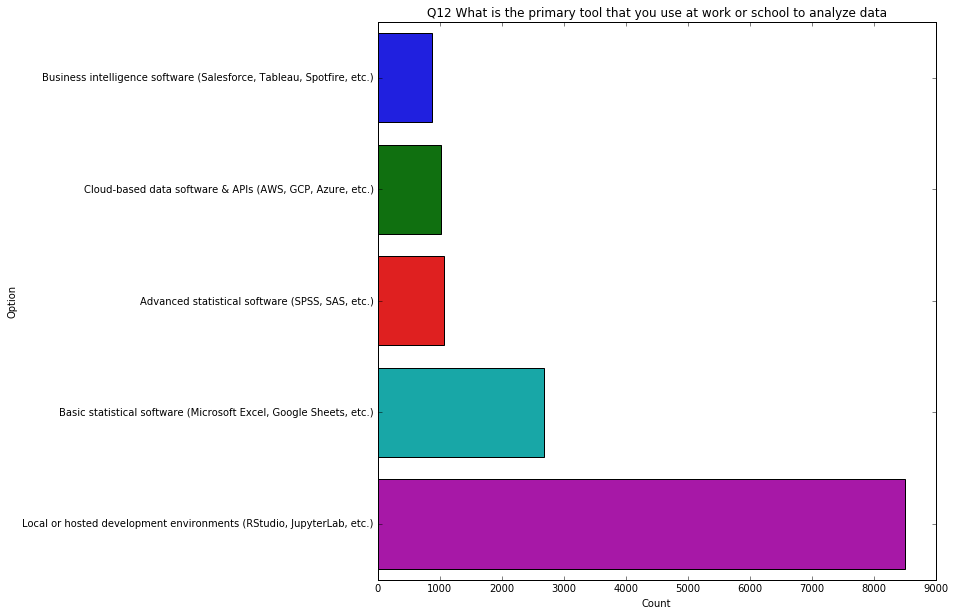

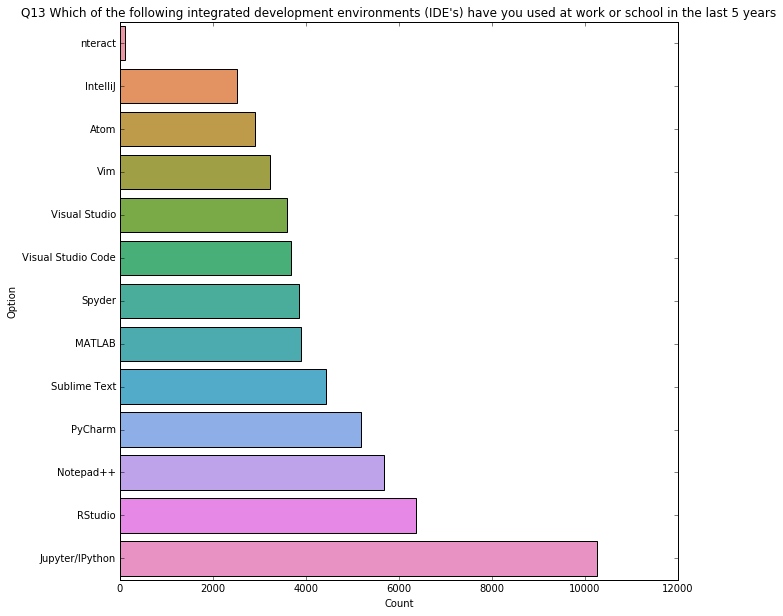

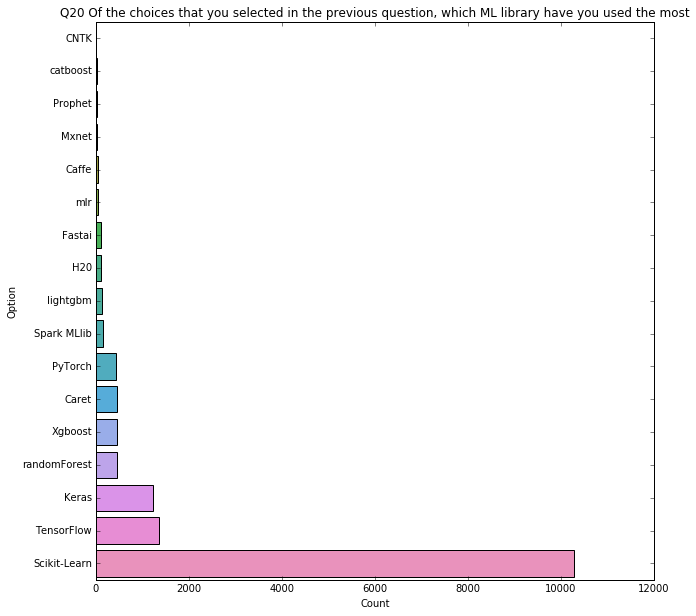

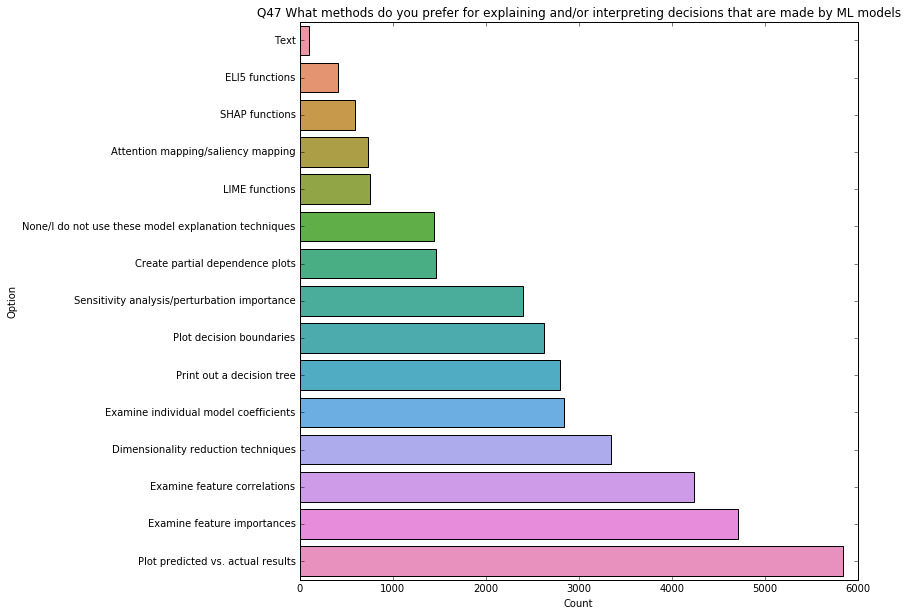

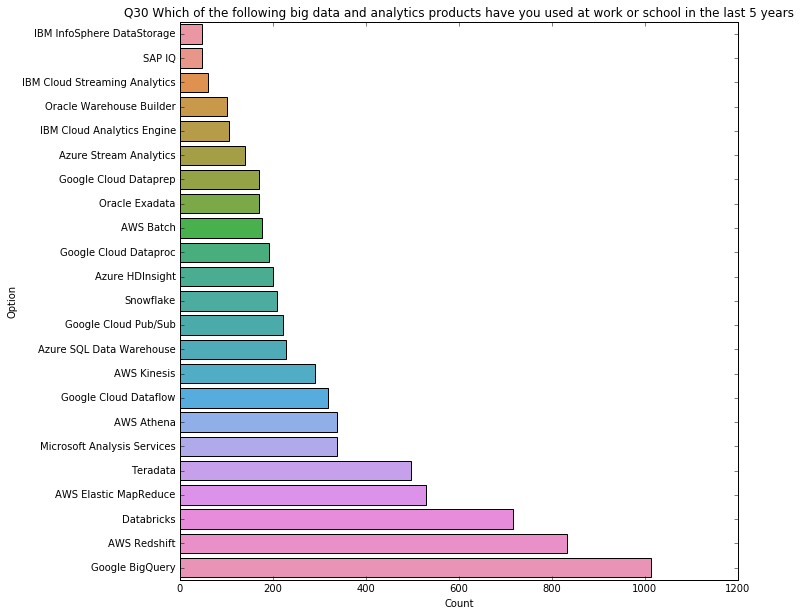

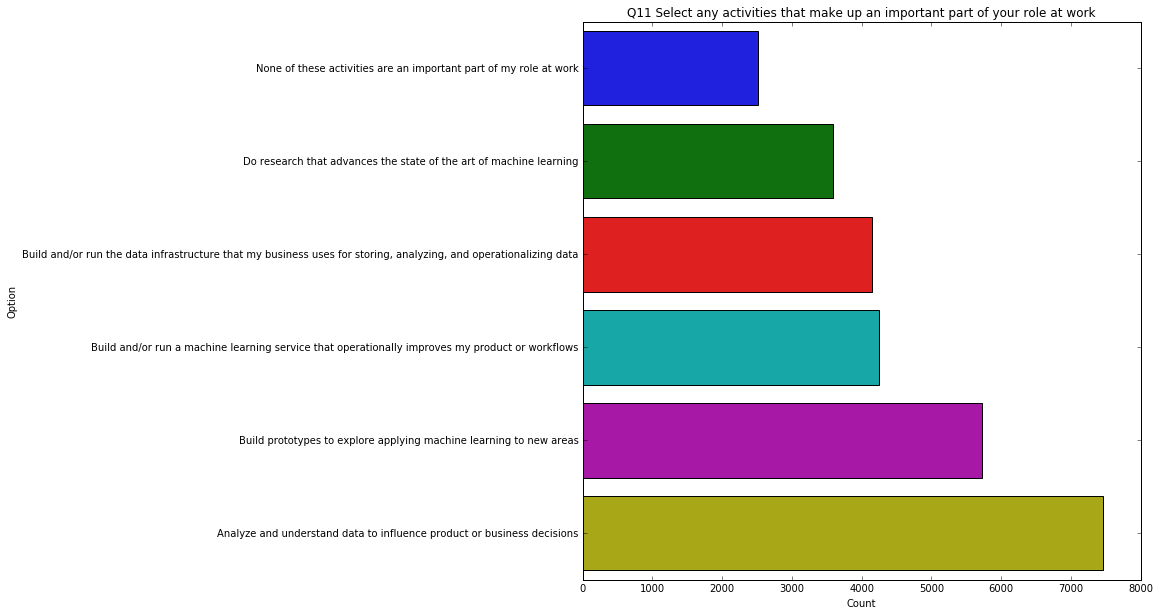

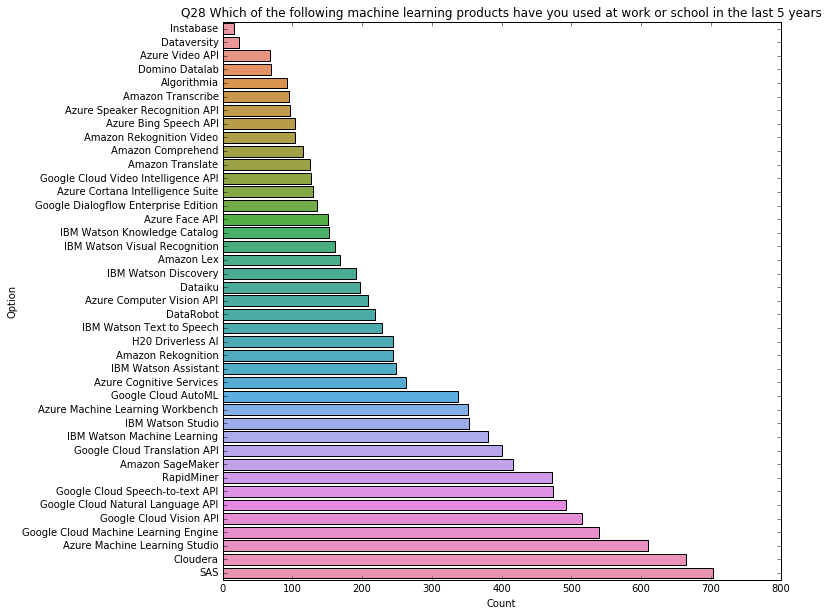

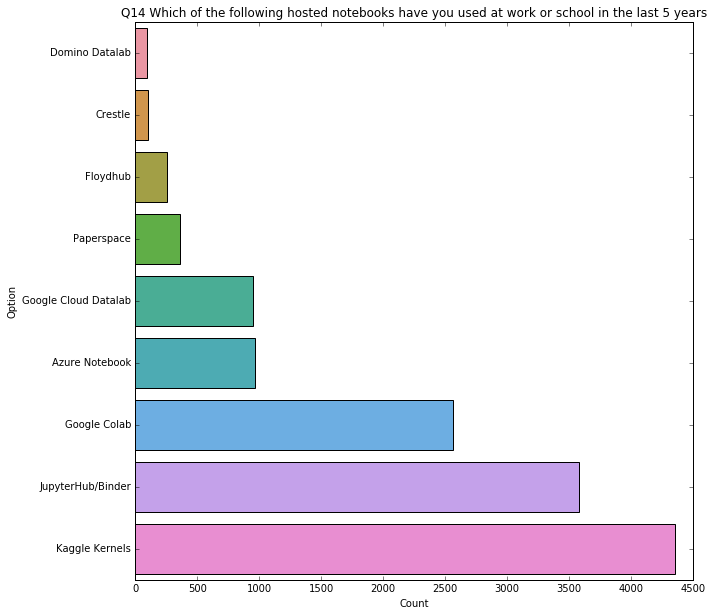

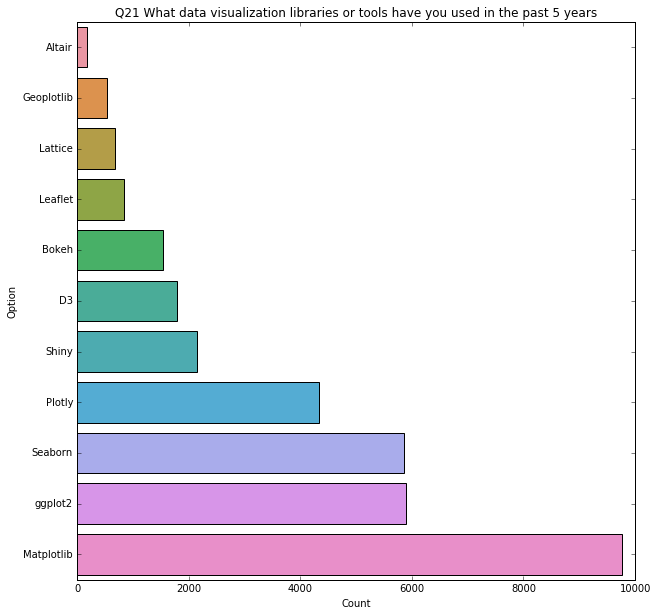

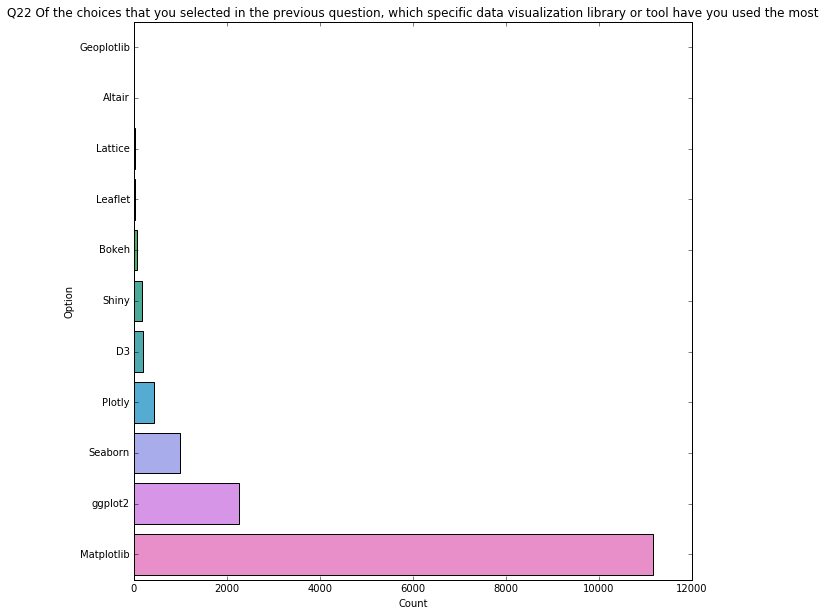

In [0]:
info = {}
for q in unique_q:
    df = get_key_count(df_category, q)
    info[q] = df

## 4. Data Analysis
Based on the popularity to decide the importance of each skill or tool. We added the percentage of each choice that was seletected from the survey.

In [0]:
# convert number of counts to percentage to be able to pick the top ones that take 50% of the market
def add_percentage(data):
    data['%'] = data.apply(lambda x: 100 * x / float(x.sum()))
    data.sort_values(by='%', ascending=False, inplace=True)
    
    return data

#### Q21: Visualization tools should be included in the course

In [0]:
add_percentage(info['Q21'])

Count          %
Option                      
Matplotlib   9761  29.075690
ggplot2      5893  17.553841
Seaborn      5856  17.443627
Plotly       4328  12.892079
Shiny        2155   6.419231
D3           1799   5.358792
Bokeh        1538   4.581335
Leaflet       845   2.517053
Lattice       679   2.022579
Geoplotlib    544   1.620446
Altair        173   0.515326

Should include most popular visulization tool in the curriculum. From our results, we should include:
* Matplotlib
* ggplot2
* Seaborn
* Plotly

#### Q4: What methods do you prefer for explaining and/or interpreting decisions that are made by ML models?

In [0]:
add_percentage(info['Q47'])

Count          %
Option                                                              
Plot predicted vs. actual results                    5841  17.024191
Examine feature importances                          4712  13.733605
Examine feature correlations                         4240  12.357913
Dimensionality reduction techniques                  3345   9.749344
Examine individual model coefficients                2840   8.277470
Print out a decision tree                            2797   8.152142
Plot decision boundaries                             2626   7.653745
Sensitivity analysis/perturbation importance         2399   6.992131
Create partial dependence plots                      1466   4.272807
None/I do not use these model explanation techn...   1447   4.217429
LIME functions                                        756   2.203439
Attention mapping/saliency mapping                    738   2.150976
SHAP functions                                        591   1.722530
ELI5 functions                                        412   1.200816
Text                                                  100   0.291460

#### Q13: Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years?

In [0]:
add_percentage(info['Q13'])

Count          %
Option                              
Jupyter/IPython     10252  18.412026
RStudio              6363  11.427596
Notepad++            5682  10.204558
PyCharm              5191   9.322749
Sublime Text         4427   7.950647
MATLAB               3894   6.993409
Spyder               3849   6.912591
Visual Studio Code   3674   6.598301
Visual Studio        3590   6.447442
Vim                  3230   5.800902
Atom                 2904   5.215424
IntelliJ             2521   4.527577
nteract               104   0.186778

IDE: 
* Jupyter/IPython
* RStudio
* Notepad++
* PyCharm
* Sublime Text

##### Q28: Which of the following machine learning products have you used at work or school in the last 5 years?

In [0]:
add_percentage(info['Q28'])

Count         %
Option                                               
SAS                                     703  6.575009
Cloudera                                664  6.210251
Azure Machine Learning Studio           610  5.705200
Google Cloud Machine Learning Engine    539  5.041152
Google Cloud Vision API                 516  4.826038
Google Cloud Natural Language API       492  4.601571
Google Cloud Speech-to-text API         474  4.433221
RapidMiner                              472  4.414516
Amazon SageMaker                        416  3.890759
Google Cloud Translation API            401  3.750468
IBM Watson Machine Learning             381  3.563412
IBM Watson Studio                       354  3.310887
Azure Machine Learning Workbench        352  3.292181
Google Cloud AutoML                     338  3.161242
Azure Cognitive Services                263  2.459783
IBM Watson Assistant                    249  2.328844
Amazon Rekognition                      245  2.291433
H20 Driverless AI                       244  2.282080
IBM Watson Text to Speech               228  2.132435
DataRobot                               219  2.048260
Azure Computer Vision API               208  1.945380
Dataiku                                 197  1.842499
IBM Watson Discovery                    192  1.795735
Amazon Lex                              168  1.571268
IBM Watson Visual Recognition           161  1.505799
IBM Watson Knowledge Catalog            152  1.421624
Azure Face API                          151  1.412271
Google Dialogflow Enterprise Edition    136  1.271979
Azure Cortana Intelligence Suite        130  1.215862
Google Cloud Video Intelligence API     127  1.187804
Amazon Translate                        126  1.178451
Amazon Comprehend                       115  1.075571
Amazon Rekognition Video                104  0.972690
Azure Bing Speech API                   104  0.972690
Azure Speaker Recognition API            96  0.897868
Amazon Transcribe                        95  0.888515
Algorithmia                              93  0.869809
Domino Datalab                           70  0.654695
Azure Video API                          68  0.635990
Dataversity                              23  0.215114
Instabase                                16  0.149645

Machine Learning Platform that should be introduced in the course:
* SAS
* Cloudera
* Azure Machine Learning Studio
* Google Cloud Machine Learning Engine
* Google Cloud Vision API
* Google Cloud Natural Language API
* Google Cloud Speech-to-text API
* RapidMiner
* Amazon SageMaker
* Google Cloud Translation API
* IBM Watson Machine Learning

## 5. Clustering
Using dendogram and hierarchy to cluster the top 50 features.

In [0]:
def dendogram_features(data_to_cluster, method, metric,color_threshold):
    list_cluster=list(data_to_cluster)
    xx=data_to_cluster.copy()
    xx=StandardScaler().fit_transform(xx)
    Z = hierarchy.linkage(xx.T, method, metric=metric)
    plt.figure(figsize=(10,30))
    dn = hierarchy.dendrogram(Z,orientation='right', labels=list_cluster,
                             leaf_font_size=18,color_threshold=color_threshold)

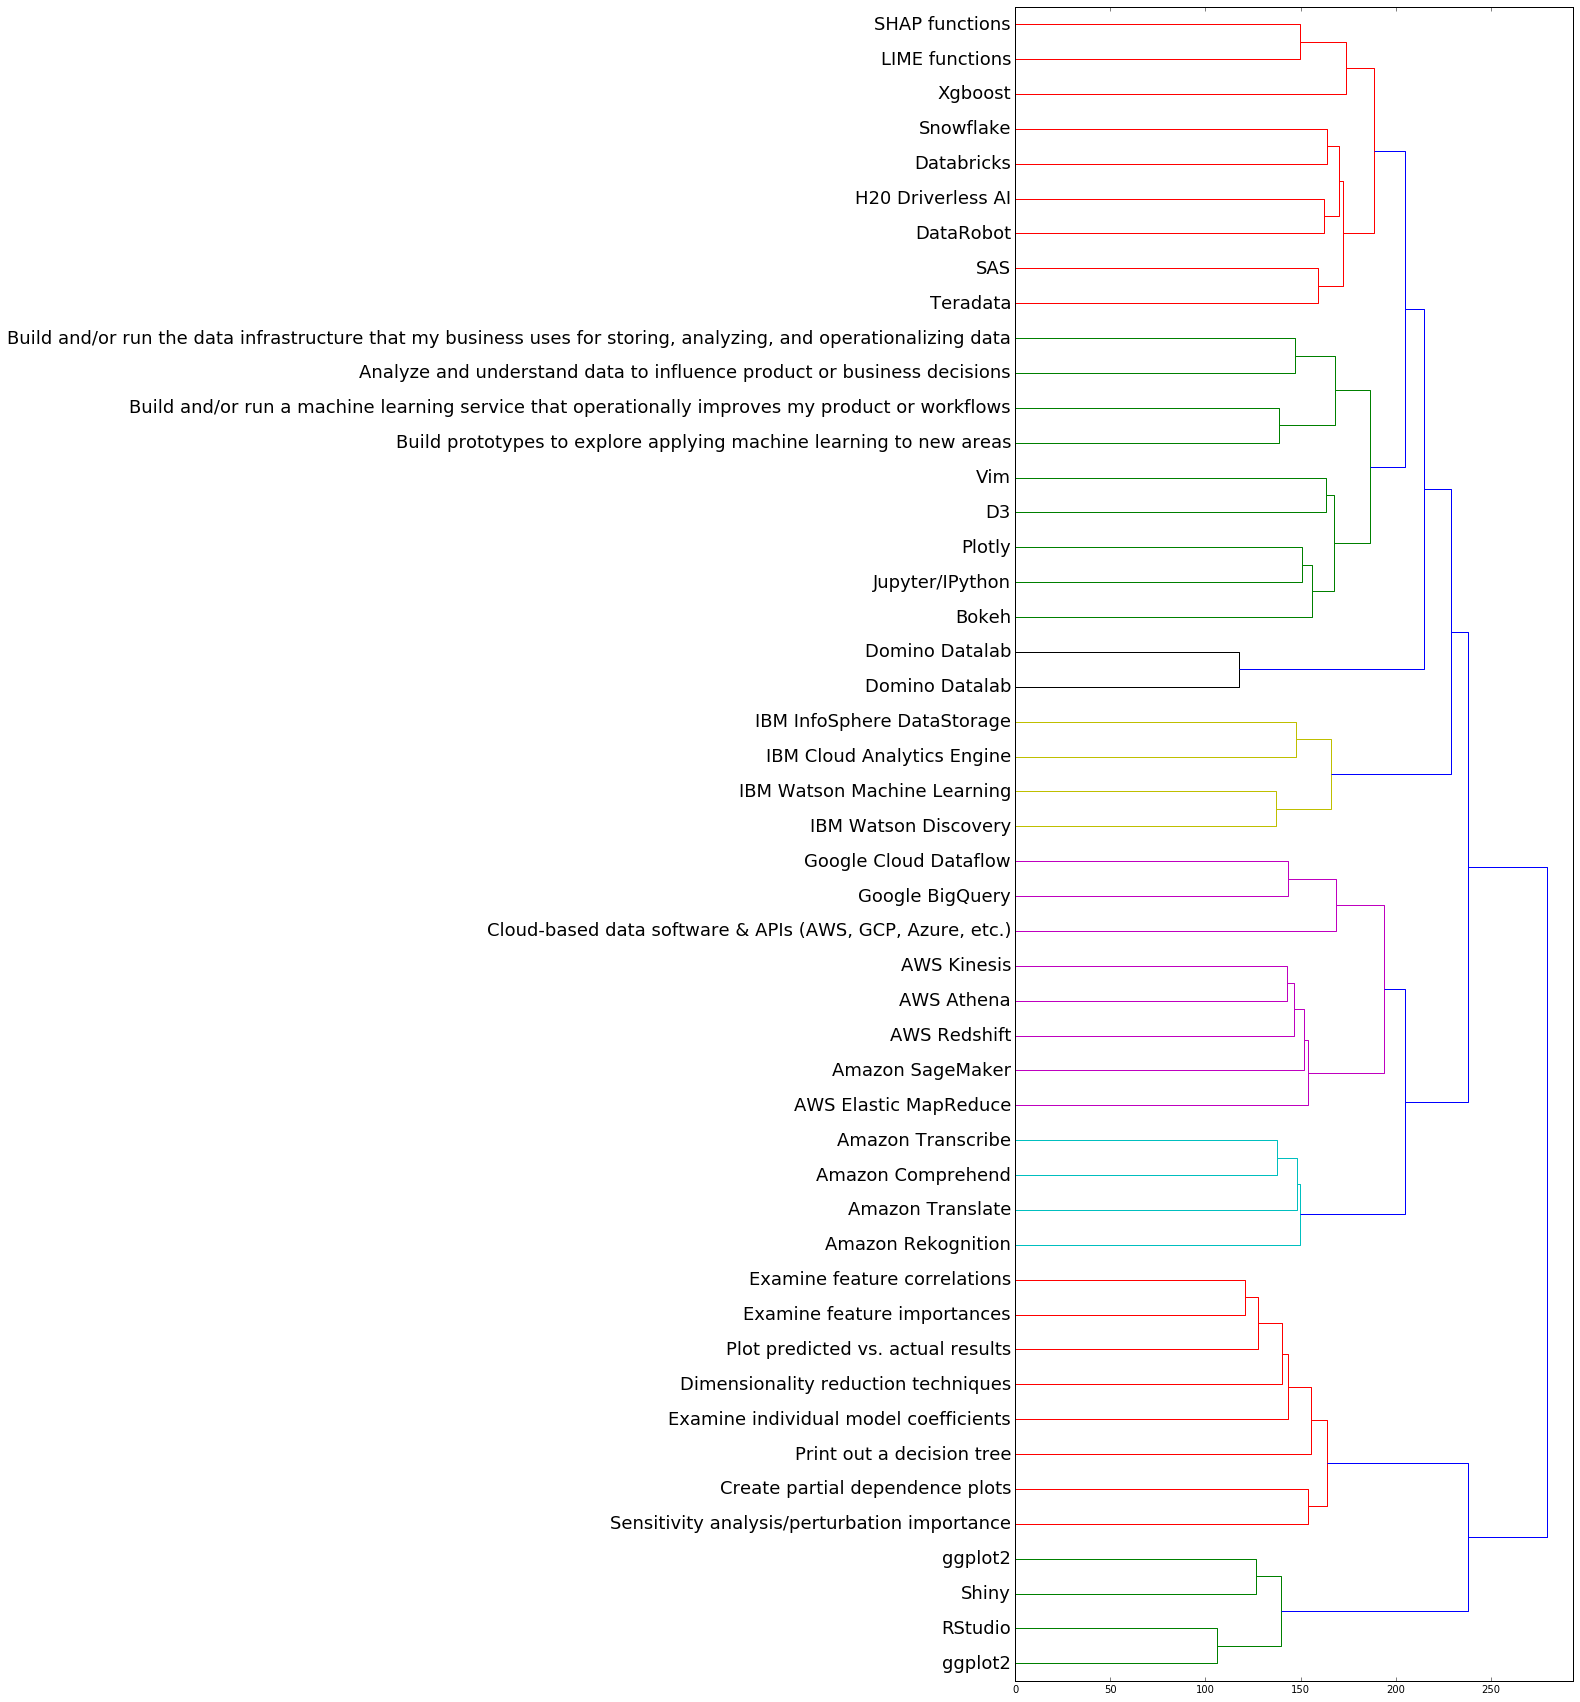

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

top_features = []

for q in top_q:
    top_features.append(get_key_word(questions, q))

top_features

df_dendogram = df_category[top_q].copy()
df_dendogram.columns=top_features

dendogram_features(df_dendogram, 'ward','euclidean',200)

### Conclusion:

From the dendogram, if we cut a line around 220, we will get 7 high level groups which contain similar topics. We may use this dendogram clustering graphy to design the modules in MIE1624 course and the content of each module.

# Part 2: Technical Data Science Curriculum

## Step 0: Import necesary modules

In [0]:
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
import nltk
from IPython.display import HTML
from matplotlib.lines import Line2D  



* In order to draw denogram, we need to define such function.

In [0]:
def dendogram_features2(data_to_cluster, method, metric,color_threshold, truncate_mode = None, orientation = 'right'):
    list_cluster=list(data_to_cluster)
    xx=data_to_cluster.copy()
    xx=StandardScaler().fit_transform(xx)
    hierarchy.set_link_color_palette( ['red', 'pink', 'orange', 'yellow', 'magenta', 'green','cyan','maroon','gray'])
    Z = hierarchy.linkage(xx.T, method, metric=metric)
    dn = hierarchy.dendrogram(Z,orientation=orientation, labels=list_cluster,
                             leaf_font_size=18,color_threshold=color_threshold, truncate_mode= truncate_mode)
    return dn


In [0]:
# Step 1: Examining the Kaggle dataset

The first dataset used is the Kaggle Salary dataset. Six most informative questions were selected for the curriculum design, including: 1) Q20: ML library most used, 2) Q27: Cloud computing products, 3) Q28: Machine learning products, 4) Q29: Relational database products, 5) Q30: Big data and analysis products, and 6) Q47: Methods preferred for explaining and/or interpreting decisions that are made by ML models. These questions were selected based on not only the top features concluded from Course Curriculum Design, but also the team’s insightful discussions on what are the most demanding skills in data science industry. 

### Read and clean the data

* Only select the relevant questions as outlined above
* Get dummies for the categorical questions
* Replace NaN with 0

In [0]:
data1 = pd.read_csv('kaggle_salary.csv',low_memory=False)
dictionary = dict(zip(data1.columns, data1.iloc[0]))
data1 = data1.drop('Unnamed: 0',axis =1)
qs_to_extract = ['Q20', 'Q28','Q30','Q47','Q29','Q27']   # These questions are decied by our group which are the most representative questions
data1 = data1.drop(index = 0)

for item in data1:
    if not any(x in item for x in qs_to_extract):  # drop the questions that are not those five identified questions as above
        data1  = data1.drop(item, axis =1)

        
# Drop the colums headers or the questions that contain  ['_OTHER' , '_Other'  ,'_None', 'TEXT' ,  'Other', 'None'] as they are not informative
for item in data1:
    if any(x in item for x in ['_OTHER' , '_Other'  ,'_None', 'TEXT' ,  'Other', 'None']) or any(x in dictionary[item] for x in ['_OTHER' , '_Other'  ,'_None', 'TEXT' ,  'Other','None']):
        data1 = data1.drop(item, axis = 1)
data1 = data1.fillna(0)

data1 = pd.get_dummies(data1)  # Get dummies for the the cleaned data.

# After get_dummies, drop the columns that end with _0 since they are the duplications for the binary questions
for item in data1:
    if item[-2:] == '_0':
        data1 = data1.drop(item,axis = 1)


temp = pd.Series()

for item in data1: # For each column ,  calculating the number of times being selected by respondents
    temp = temp.append(pd.Series([sum(data1[item])], index=[item]))  


# To reduce the number of features, I only select top 20% feature for each question.
final_index = []
for x in qs_to_extract:  # THe following function 
    if x == 'Q47':
        final_index.extend(list(temp[[x in item for item in temp.index]].sort_values(ascending = False)[:int(sum([x in item for item in temp.index])*1)].index))   # I preserve all the features in question 47
    else:
        final_index.extend(list(temp[[x in item for item in temp.index]].sort_values(ascending = False)[:int(sum([x in item for item in temp.index])*0.2)].index))

data_to_plot = data1[final_index] # finalize the dataset for plotting

rename  = [item.split('_')[-1] for item in data_to_plot] # Rename the header name to drop the questions numbers.
data_to_plot.columns = rename  

### Clustering and generate dendrogram

<function matplotlib.pyplot.show>

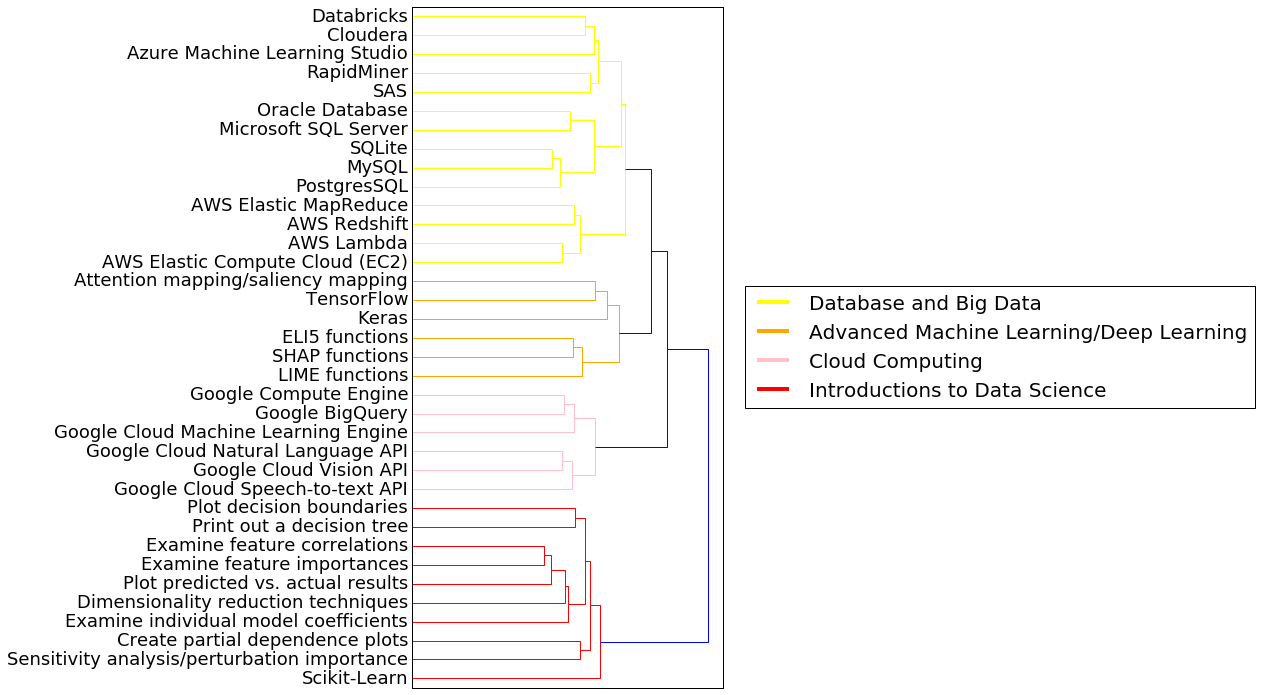

In [0]:
f,ax = plt.subplots(figsize = (5,10))
plt.tight_layout()
ax.get_xaxis().set_visible(False)

custom_lines = [Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='red', lw=4)]

ax.legend(custom_lines, ['Database and Big Data', 'Advanced Machine Learning/Deep Learning', 'Cloud Computing', 'Introductions to Data Science'],loc='center left',bbox_to_anchor=(1.04,0.5), fontsize = 20)

dn = dendogram_features2(data_to_plot, 'ward','euclidean',200)  # Plot the dendogram to show the clustering of the courses.
# plt.savefig('part2.pdf',bbox_inches="tight")
plt.show

* The above diagram shows that the Data Science Program should cover four basic courses, including: 1) Database and Big data, 2) Advanced Machine Learning/Deep Learning, 3) Cloud Computing, and 4) Introduction to Data Science.

## Step 2: Examine  job postings from Indeed

In an effort to further expand course offerings in this curriculum, the team also examined related job postings from Indeed.com. Most frequently, these job postings contain not only essential  qualifications of ideal a candidate but also the soft skills necessary for one’s success. Thus, these job postings will provide the team with insights into other skill sets which can be offered as optional courses in this curriculum. The team made a search query with keyword “data scientist” and the top 800 postings at the time of search query were selected as the dataset. The team used a keyword dictionary that contains 131 skills to parse each job posting in the dataset. The skills in this dictionary are sourced from numerous similar job posting parsers contributed by the online data science community.

### Read the data obtained from the scraped dataset

In [0]:
results_df=pd.read_csv('data_science_skills_CA.csv') # import the scrapped data from Indeed.com with search keyword of 'data science'
data_scientist_jobs=results_df.copy()
results_df.head()
results_dict = {}   # empty dictionary to store results of parsing of job pages
results_sal={}
results_title={}
results_company={}
for index in results_df['Unnamed: 0']:
        results_dict[index] = {}
        results_sal[index] = {}
        results_title[index] = {}
        results_company[index]={}


###  Parse the dataset using the skill dictionary

* First we define the skills dictionary that is used to parse the descriptions of each job posting
* For each job posting description, we use the keyword matching technique to get the skills vector.

In [0]:
# dictionary with skills used to parse job descriptions, categories become columns in 'results_df'
skills_keywords_dict = {
                            # tech skills
                            'data analytics': ['data analytics', 'data analysis'],
                            'Excel': ['Excel'],
                            'VBA': ['VBA', 'Visual Basic for Applications'],
                            'Python': ['Python'],
                            'R': ['R ', ' R ', 'R,', 'R/'], # 'R' surrounded by spaces and signs
                            'Ruby': ['Ruby'],
                            'Java/Scala': ['Java', 'JVM', 'Scala'],
                            'C/C++': ['C/C++', 'C++', ' C '],   # 'C' surrounded by spaces and signs
                            'C#': ['C#',"C#/.NET"],
                            'MATLAB': ['MATLAB', 'Matlab', 'matlab'],
                            'SAS': ['SAS'],
                            'PHP': ['PHP'],
                            'SQL/databases': ['SQL', 'databases'],
                            'SPSS': ['SPSS'],
                            'Stata': ['Stata'],
                            'RapidMiner': ['RapidMiner', 'Rapid Miner'],
                            'Machine Learning': ['Machine Learning', 'ML'],
                            'Data Mining/Analytics': ['Data Mining', 'DM', 'Analytics'],
                            'NLP': ['Natural Language Processing', 'NLP', 'text mining'],
                            'Visualisation': ['Visualisation', 'Visualization'],
                            'categorical data': ['categorical data', 'categorical'],
                            'ggplot2': ['ggplot2'],
                            'time series': ['time series', 'time-series'],
                            
                            'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive', 
                                         'beam', 'Hadoop', 'MapReduce', 'Hbase'],
                            'Cloud': ['Cloud', 'AWS', 'GCP', 'Azure ', 'Google Cloud'],
                            'REST': ['REST', 'flask', 'Sinatra'],
                            'Math': ['Algebra', 'Statistics', 'Operations research'],    
                            'DevOps': ['DevOps', 'TDD', 'test-driven', 'GitHub'],
                            #'plotting': ['plotting'],
                            'data cleaning': ['data cleaning', 'cleaning data'],
                            'OOP': ['object oriented programming','object oriented'],
                            'stochastic': ['stochastic'],
                            'software development': ['software development'],
                            'social media': ['social media'],
                            'sentiment analysis': ['sentiment analysis'],
                            'Markov decision process': ['Markov decision'],
                            'linear algebra': ['linear algebra'], 
                            'technical writing': ['technical writing', 'academic writing'],
                            'parallel computing': ['parallel computing'],
                            #IDE's
                            'Jupyter/IPython': ['Jupyter/IPython', 'Jupyter', 'IPython'],
                            'RStudio': ['RStudio'],
                            'PyCharm': ['PyCharm'],
                            'Visual Studio Code': ['Visual Studio Code'],   
                            'nteract': ['nteract'],                    
                            'IDEs': ['integrated development environments', 'IDE'],
                            'Visual Studio Code': ['Visual Studio Code'],
                            'Atom': ['Atom'],
                            'Visual Studio': ['Visual Studio'],
                            'Notepad++': ['Notepad++'],
                            'Sublime Text': ['Sublime Text'],
                            'IntelliJ': ['IntelliJ'],
                            'Spyder': ['Spyder'],
                            
                            #cloud
                            'Cloud': ['Cloud'],
                            'Google Cloud': ['Google Cloud', 'GCP'],
                            'AWS':['Amazon Web Services','AWS'],
                            'Microsoft Azure': ['Microsoft Azure', 'Azure'],
                            'IBM Cloud': ['IBM Cloud', 'Cloud IBM'],
                            'Alibaba Cloud': ['Alibaba Cloud'],
                            
                            #Stats:
                            'statistics': ['statistics', 'Statistics'],
                            'probability': ['probability'],
                            'hypothesis test': ['hypothesis test','hypothesis testing'],
                            'ANOVA': ['ANOVA'],
                            'Bayesian Modelling': ['Bayesian Modelling','Bayesian modelling'],
                            
                            # ML
                            'Scikit-Learn': ['Scikit-Learn','sklearn', 'Sklearn', 'Scikit'],
                            'TensorFlow': ['TensorFlow'],
                            'Keras': ['Keras'],
                            'PyTorch': ['PyTorch'],
                            'Spark MLlib': ['Spark MLlib'],
                            'H20': ['H20'],
                            'Fastai': ['Fastai'],
                            'Mxnet': ['Mxnet'],
                            'Caret': ['Caret'],
                            'Xgboost': ['Xgboost'],
                            'mlr': ['mlr'],
                            'Prophet': ['Prophet'],
                            'randomForest': ['randomForest'],
                            'catboost': ['catboost'],
                            'CNTK': ['CNTK'],
                            'Caffe': ['Caffe'],
                            
    
                            #ML topics
                            'bias-variance': ['bias-variance'],
                            'degrees of freedom': ['degrees of freedom'],
                            'simulation': ['simulation'],
                            'neural networks':['NN','neural networks','Neural Networks'],
                            'regression': ['regression','Regression'],
                            'random forest': ['Random Forest', 'random forest', 'random forests'],
                            'decision tree': ['decision tree', 'decision trees'],
                            'optimization': ['optimization'],
                            'cognitive computing': ['cognitive computing'],
                            'artifical intelligence': ['AI', 'artifical intelligence', 'Artifical intelligence'],
                            'hyperparameter tuning': ['hyperparameter', 'hyperparameter tuning'],
                            'Monte Carlo simulation': ['Monte Carlo simulation','Monte Carlo'],
                            'reinforcement learning': ['reinforcement learning'],
    'deep learning': ['deep learning'],
    'computer vision': ['computer vision'],
    'feature engineering': ['feature engineering'],
    'unsupervised learning': ['unsupervised learning', 'hierarchical clustering', 'clustering'],
    'correlation': ['correlation', 'autocorrelation'],
    
                            # soft skills (https://www.monster.com/career-advice/article/soft-skills-you-need)
                            'communication': ['communication', 'presentation'],
                            'problem solving': ['problem solving'],
                            'project_management': ['project management'],
                            'leadership': ['leadership'],
                            'consulting': ['consulting'],
                            'flexibility': ['flexibility', 'adaptability', 'teachable'],
                            'professionalism': ['professionalism'],
                            'teamwork': ['teamwork', 'teamplayer'],
                            'high-energy': ['high-energy', 'energetic'],
                            'self-starter': ['self-starter'],
    'multi-task': ['multi-task', 'multitask'],
    'ethics': ['ethics', 'ethical'],
    'creativity': ['creativity'],
                            # general skills
                            'academic': ['academic','academically'],  
                            'research': ['research', 'r&d'], 
                            'industrial': ['industrial'],
                            'customer service': ['customer service'],
                            'linear algebra': ['linear algebra'],
                            'master': ['master'],
                            # field of work:    
                            'medicine': ['medicine','medical','clinic'],
                            'finance': ['financial', 'finance','bank', 'banks'],
    'sales': ['sales'],
    'real-estate':['real-estate','real estate'],
    'natural resources': ['oil and gas','petroleum','natural resorces', 'mining', 'metals'],
    'government': ['government'],
    'marketing': ['marketting', 'advertising','marketting'], 
    'supply chain': ['supply chain'],
    'investment': ['investment'],
    'entrepreneurship': ['entrepreneurship', 'entrepreneur'],
    'accounting': ['accounting'],
    'economics': ['economics'],
    'quality assurance': ['quality assurance'],
    'operations management': ['operations management'],
    'Risk and Return': ['risk and return', 'Risk and Return'],
    'Cash Flow': ['Cash Flow', 'cash flow'],
    'culture': ['culture']
    
}
skills_keywords_dict_data_science =skills_keywords_dict.copy()
level_job = {
        'intern': ['intern','co-op', 'coop'],
        'junior': ['junior'],
        'intermediate': ['intermediate'],
        'senior': ['senior']
        }
# search for the skills
soup_job_text = results_df['job_description']
soup_job_title = results_df['job_title']
for index in results_df['Unnamed: 0']:
    category_found = 0

    if soup_job_text.iloc[index].find('$')!=1:
        results_sal[index]=[number for number in soup_job_text.iloc[index].split() if number[0]=='$']
    
    for skill_category, skills in skills_keywords_dict.items(): # loop over all keys and sublists in 'skills_keywords_dict'
            
        category_found = 0   # variable used to store results of the intermediate check (loop below)
            
        for skill in skills:        # loop over all skills in the sublist of 'skills_keywords_dict'
            if soup_job_text.iloc[index].find(skill) != -1:     # if skill from the sublist is found, set 'category_found' to 1
                 category_found = 1
            
                 results_dict[index][skill_category] = category_found   # skill set to 1 if found, 0 if not, in 'resutls_dict'
            
        
    for level_category, levels in level_job.items(): # loop over all keys and sublists in 'skills_keywords_dict'
            
        category_found = 0   # variable used to store results of the intermediate check (loop below)
            
        for level in levels:        # loop over all skills in the sublist of 'skills_keywords_dict'
            if soup_job_title.iloc[index].find(level) != -1:     # if skill from the sublist is found, set 'category_found' to 1
                 category_found = 1
            
                 results_title[index][level_category] = category_found   # skill set to 1 if found, 0 if not, in 'resutls_dict'
                
# Sccal the dataset. This step may make the results more accurate and improve the clustering since the origional dataset is quite noisy 
results_reeval=pd.DataFrame.from_dict(results_dict, orient='index')

results_reeval=results_reeval.fillna(0)
results_reeval.head()
xx=results_reeval.copy()
xx=StandardScaler().fit_transform(xx)
df = pd.DataFrame(xx, columns=list(results_reeval))


### Plot the dendrogram for the kaggle dataset

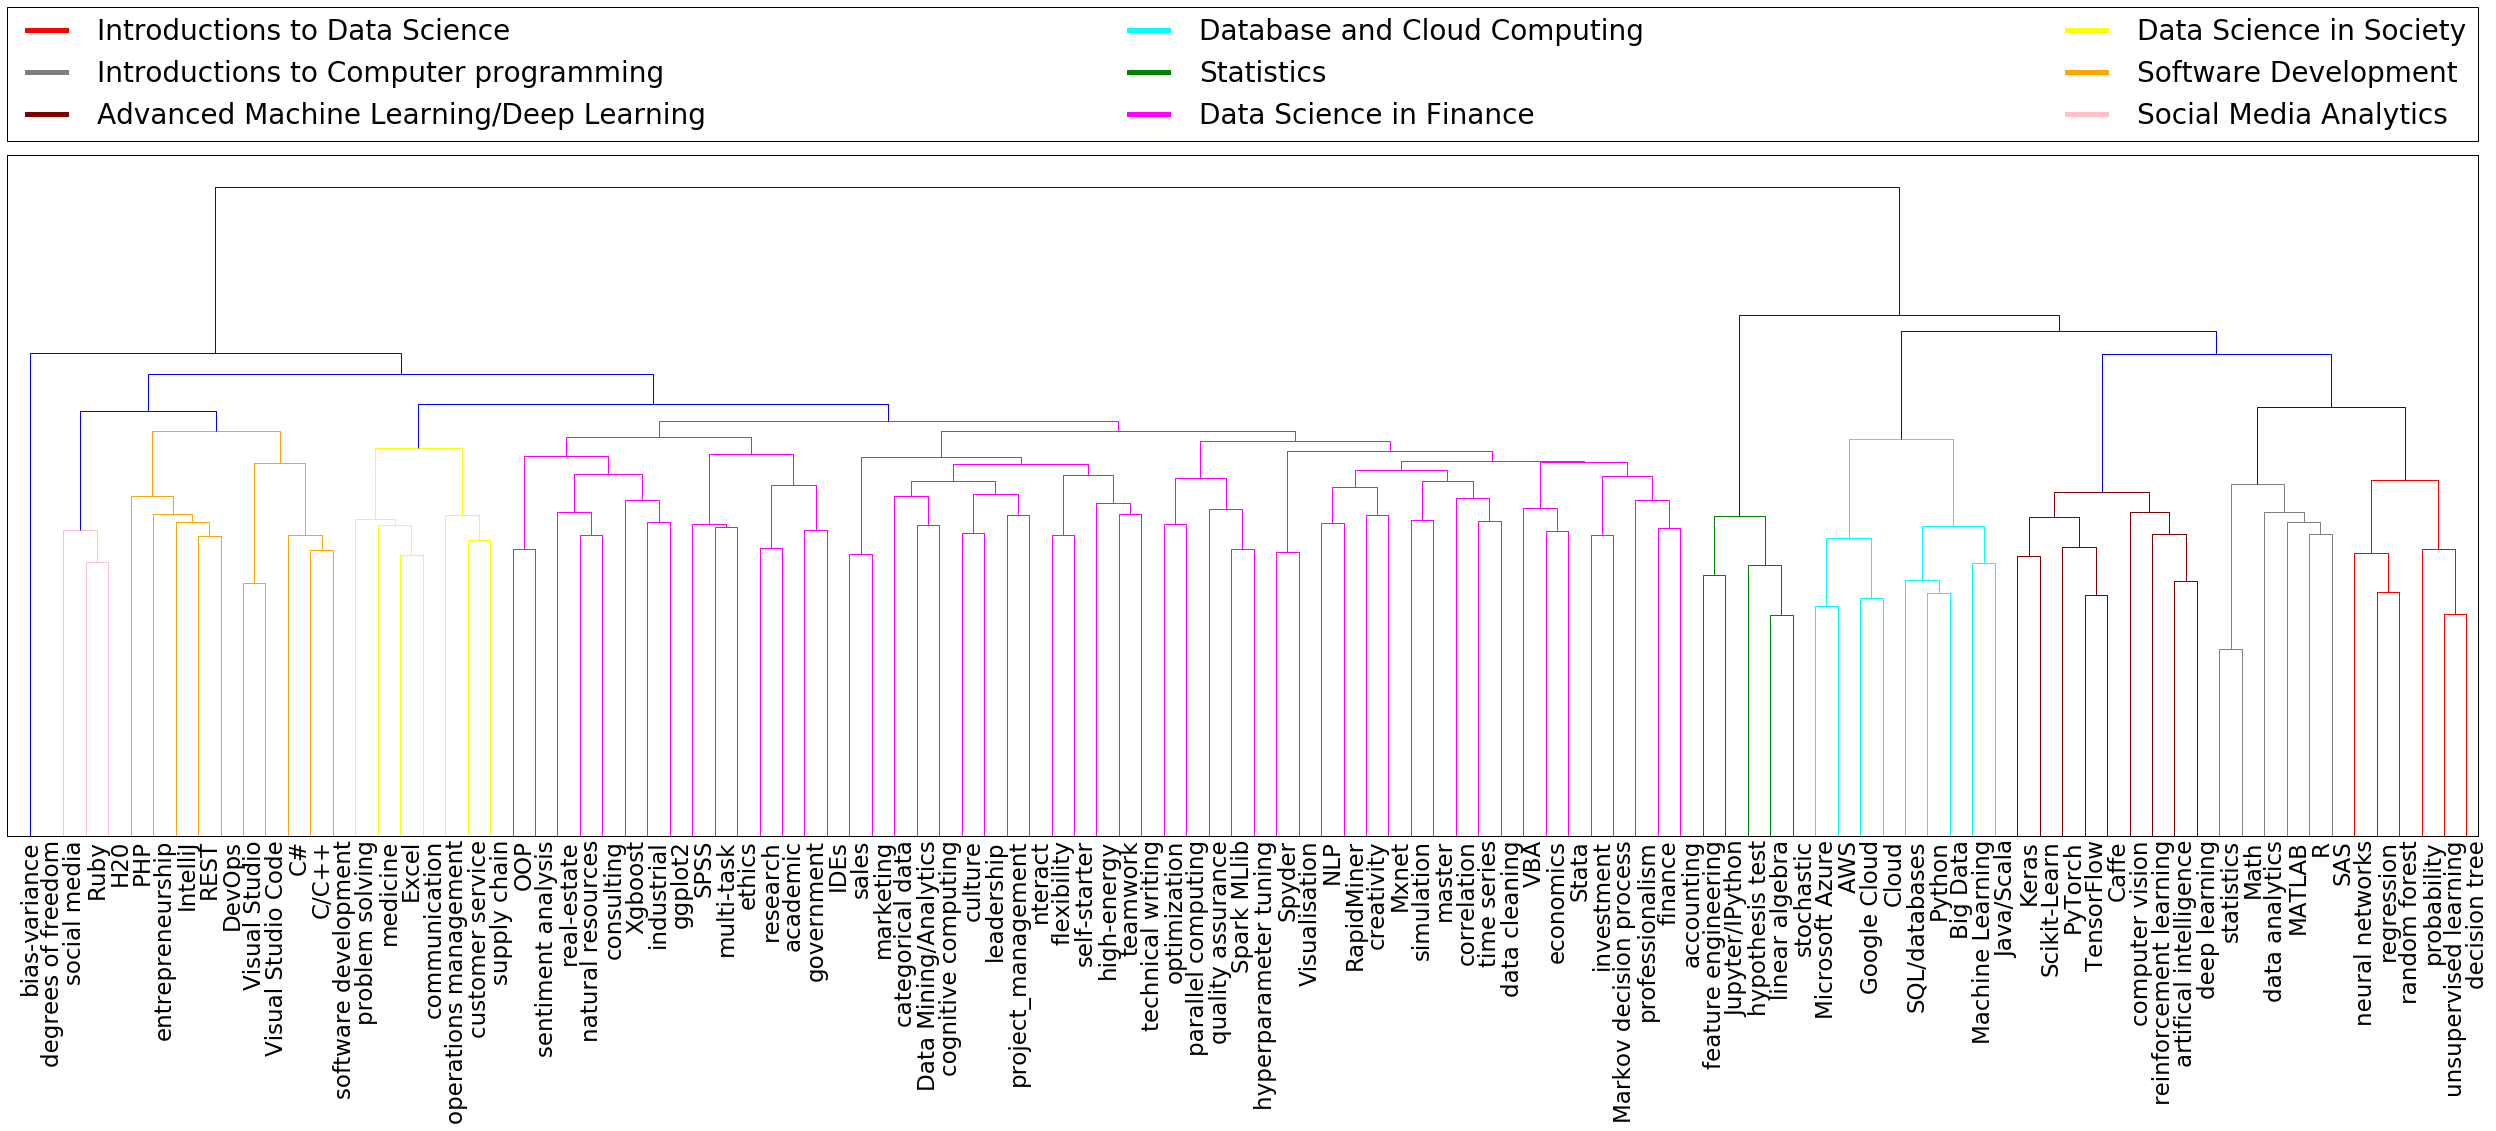

In [0]:
# Generate the dendogram for the curriculum design 
f,ax = plt.subplots(figsize = (35,10))
plt.tight_layout()
ax.get_yaxis().set_visible(False)

# Customize legends
custom_lines = [Line2D([0], [0], color='red', lw=5),
                Line2D([0], [0], color='gray', lw=5),
                Line2D([0], [0], color='maroon', lw=5),
                Line2D([0], [0], color='cyan', lw=5),
                Line2D([0], [0], color='green', lw=5),
                Line2D([0], [0], color='magenta', lw=5),
                Line2D([0], [0], color='yellow', lw=5),
                Line2D([0], [0], color='orange', lw=5),
                Line2D([0], [0], color='pink', lw=5)]

# Customize legends cont'd

ax.legend(custom_lines, ['Introductions to Data Science', 'Introductions to Computer programming', 'Advanced Machine Learning/Deep Learning',\
                         'Database and Cloud Computing', 'Statistics', 'Data Science in Finance', 'Data Science in Society', 'Software Development', 'Social Media Analytics'],\
          loc=3,ncol=3,bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 28,mode="expand",borderaxespad=0.)

# Plot the dendogram
dn = dendogram_features2(df, 'ward','euclidean',50,truncate_mode = None, orientation = 'top')  # Plot the dendogram to show the clustering of the courses.
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right",rotation_mode='anchor',fontsize =23)

plt.show()

* The above figure  shows that this program should cover 9 courses, including: 1) Introduction to Data Science, 2) Introduction to computer programming, 3) Advanced Machine Learning/Deep Learning, 4) Database and Cloud Computing, 5) Statistics, 6) Data Science in Finance, 7) Data Science in Society, 8) Software Development, and 9) Social media Analysis. 

## Conclusions and discussions

From the results, the courses obtained from two datasets have overlap, indicating that these specific courses important to cover. These courses are then offered as required courses for this program, including: 1) Introduction to Data Science, 2) Cloud Computing, 3) Advanced Machine Learning/Deep Learning, and 4) Database.  As social media analysis does not have enough contents to be covered as a course. It is better to be designed as a project: Social media analysis using data analysis. The other courses are offered as elective courses.

<a id='top'></a>
## Parts 3 & 4

This section implements the following functions:

* takes as input from webscrapped data from Indeed using different keywords
* parses each job posting description to extract information with job details and skills mentioned in each job posting
* summarizes and displays results
* Performs unsupervised and supervised machine learning algorithms to observe trends on the data


The following are functions used for unsupervised learning (kmeans and hierarchical clustering)

In [0]:
def dendogram_features(data_to_cluster, method, metric,color_threshold):
    list_cluster=list(data_to_cluster)
    xx=data_to_cluster.copy()
    xx=StandardScaler().fit_transform(xx)
    Z = hierarchy.linkage(xx.T, method, metric=metric)
    plt.figure(figsize=(14,4))
    dn = hierarchy.dendrogram(Z,orientation='top', labels=list_cluster,
                             leaf_font_size=16,color_threshold=color_threshold)


In [0]:
def cluster_features3(data_to_cluster,num):    
    list_cluster=list(data_to_cluster)
    xx=data_to_cluster.copy()
    xx=StandardScaler().fit_transform(xx)
    
    kmeans = KMeans(n_clusters=num,random_state=0).fit(xx.T)
    y_kmeans = kmeans.predict(xx.T)
    distances=kmeans.transform(xx.T)
    dist=[]
    dist[:] = [x * 5 for x in dist]
    for i in distances:
        dist.append(i[0])
    fig = plt.figure(figsize=(15,12))
    fig.suptitle('K means cluster (k='+str(num)+') for business and management in analysis and ai', fontsize=14, fontweight='bold')
    plt.xlabel('Groups')
    ax = Axes3D(fig)
    ax.scatter(y_kmeans, np.arange(len(xx.T)), dist, c=y_kmeans, s=200)
    for i in range(len(xx.T)):
        ax.text(y_kmeans[i],np.arange(len(xx.T))[i], dist[i], list_cluster[i], size=12)
    ax.view_init(70, 70)
    pyplot.show()
    return y_kmeans


def k_means_cluster_result(data_to_cluster,num):
    
    list_cluster=list(data_to_cluster)
    xx=data_to_cluster.copy()
    xx=StandardScaler().fit_transform(xx)
    kmeans = KMeans(n_clusters=num,random_state=0).fit(xx.T)
    y_kmeans = kmeans.predict(xx.T)
    result={}
    
    for i in range(num):
        result[i] = []
        for j in range(len(y_kmeans)):
            if y_kmeans[j]==i:
                result[i].append(list_cluster[j])
    return result 

# Part 3: Managerial and Business Data Science program curriculum design

A dataset obtained through web scrapping indeed website for the key words "data analyst project management business" was used in this section: 

In [0]:
data_management_df=pd.read_csv('data_analyst_project_management_business_skills.csv')
data_management_df.head()

Unnamed: 0                                          job_title  \
0           0                                       Data Analyst   
1           1  Pension Specialist and Pension Analyst, Data &...   
2           2                           SAP Business One Analyst   
3           3                      Business Intelligence Analyst   
4           4                        Information Systems Analyst   

                                        company_name   job_location      date  \
0  British Columbia College of Nursing Professionals  Vancouver, BC  save job   
1            Alberta Teachers' Retirement Fund Board   Edmonton, AB  save job   
2                             Weishaupt Design Group    Toronto, ON  save job   
3                                Absorb Software Inc    Calgary, AB  save job   
4  Accrette Information Technology Professional S...    Halifax, NS  save job   

                                     job_description  Alibaba Cloud  \
0  Does the idea of data, where it comes from, ho...              0   
1  The Alberta Teachers' Retirement Fund Board (A...              0   
2  PermanentWeishaupt Design Group is a North Ame...              0   
3  Job Purpose: The ideal candidate demonstrates ...              0   
4  $20 - $30 an hourWe are looking for an Informa...              0   

   Amazon Web Services (AWS)  Atom  Big Data      ...       catboost  \
0                          0     0         0      ...              0   
1                          0     0         0      ...              0   
2                          0     0         0      ...              0   
3                          0     0         0      ...              0   
4                          0     0         0      ...              0   

   communication  consulting  integrated development environments  leadership  \
0              1           0                                    0           0   
1              1           0                                    0           0   
2              0           0                                    0           0   
3              1           0                                    0           0   
4              1           0                                    0           0   

   mlr  nteract  problem solving  project_management  randomForest  
0    0        0                0                   0             0  
1    0        1                0                   0             0  
2    0        0                0                   0             0  
3    0        0                1                   0             0  
4    0        0                0                   1             0  

[5 rows x 68 columns]

Data pre-processing: identify the features from the job descriptions:

In [0]:
results_dict = {}   # empty dictionary to store results of parsing of job pages
for index in range(len(data_management_df)):
        results_dict[index] = {}

In [0]:
skills_keywords_dict = {
                            # tech skills
                            'data analytics': ['data analytics', 'data analysis'],
                            'Excel': ['Excel'],
                            'VBA': ['VBA', 'Visual Basic for Applications'],
                            'Python': ['Python'],
                            'R': ['R ', ' R ', 'R,', 'R/'], # 'R' surrounded by spaces and signs
                            'Ruby': ['Ruby'],
                            'Java/Scala': ['Java', 'JVM', 'Scala'],
                            'C/C++': ['C/C++', 'C++', ' C '],   # 'C' surrounded by spaces and signs
                            'C#': ['C#',"C#/.NET"],
                            'MATLAB': ['MATLAB', 'Matlab', 'matlab'],
                            'SAS': ['SAS'],
                            'PHP': ['PHP'],
                            'SQL/databases': ['SQL', 'databases'],
                            'SPSS': ['SPSS'],
                            'Stata': ['Stata'],
                            'RapidMiner': ['RapidMiner', 'Rapid Miner'],
                            'Machine Learning': ['Machine Learning', 'ML'],
                            'Data Mining/Analytics': ['Data Mining', 'DM', 'Analytics'],
                            'NLP': ['Natural Language Processing', 'NLP', 'text mining'],
                            'Visualisation': ['Visualisation', 'Visualization'],
                            'categorical data': ['categorical data', 'categorical'],
                            'ggplot2': ['ggplot2'],
                            'time series': ['time series', 'time-series'],
                            'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive', 
                                         'beam', 'Hadoop', 'MapReduce', 'Hbase'],
                            'Cloud': ['Cloud', 'AWS', 'GCP', 'Azure ', 'Google Cloud'],
                            'REST': ['REST', 'flask', 'Sinatra'],
                            'Math': ['Algebra', 'Statistics', 'Operations research'],    
                            'DevOps': ['DevOps', 'TDD', 'test-driven', 'GitHub'],
                            'plotting': ['plotting'],
                            'data cleaning': ['data cleaning', 'cleaning data'],
                            'object oriented programming': ['object oriented programming','object oriented'],
                            'stochastic': ['stochastic'],
                            'software development': ['software development'],
                            'social media': ['social media'],
                            'sentiment analysis': ['sentiment analysis'],
                            'Markov decision process': ['Markov decision'],
                            'linear algebra': ['linear algebra'], 
                            'technical writing': ['technical writing', 'academic writing'],
                            'parallel computing': ['parallel computing'],
                            #IDE's
                            'Jupyter/IPython': ['Jupyter/IPython', 'Jupyter', 'IPython'],
                            'RStudio': ['RStudio'],
                            'PyCharm': ['PyCharm'],
                            'Visual Studio Code': ['Visual Studio Code'],   
                            #'nteract': ['nteract'],                    
                            'integrated development environments': ['integrated development environments', 'IDE'],
                            'Visual Studio Code': ['Visual Studio Code'],
                            'Atom': ['Atom'],
                            'Visual Studio': ['Visual Studio'],
                            'Notepad++': ['Notepad++'],
                            'Sublime Text': ['Sublime Text'],
                            'IntelliJ': ['IntelliJ'],
                            'Spyder': ['Spyder'],
                            
                            #cloud
                            'Cloud': ['Cloud'],
                            'Google Cloud': ['Google Cloud', 'GCP'],
                            'Amazon Web Services (AWS)':['Amazon Web Services','AWS'],
                            'Microsoft Azure': ['Microsoft Azure', 'Azure'],
                            'IBM Cloud': ['IBM Cloud', 'Cloud IBM'],
                            'Alibaba Cloud': ['Alibaba Cloud'],
                            
                            #Stats:
                            'statistics': ['statistics', 'Statistics'],
                            'probability': ['probability'],
                            'hypothesis test': ['hypothesis test','hypothesis testing'],
                            'ANOVA': ['ANOVA'],
                            'Bayesian Modelling': ['Bayesian Modelling','Bayesian modelling'],
                            
                            # ML
                            'Scikit-Learn': ['Scikit-Learn','sklearn', 'Sklearn', 'Scikit'],
                            'TensorFlow': ['TensorFlow'],
                            'Keras': ['Keras'],
                            'PyTorch': ['PyTorch'],
                            'Spark MLlib': ['Spark MLlib'],
                            'H20': ['H20'],
                            'Fastai': ['Fastai'],
                            'Mxnet': ['Mxnet'],
                            'Caret': ['Caret'],
                            'Xgboost': ['Xgboost'],
                            'mlr': ['mlr'],
                            'Prophet': ['Prophet'],
                            'randomForest': ['randomForest'],
                            'catboost': ['catboost'],
                            'CNTK': ['CNTK'],
                            'Caffe': ['Caffe'],
                            
    
                            #ML topics
                            'bias-variance': ['bias-variance'],
                            'degrees of freedom': ['degrees of freedom'],
                            'simulation': ['simulation'],
                            'neural networks':['NN','neural networks','Neural Networks'],
                            'regression': ['regression','Regression'],
                            'random forest': ['Random Forest', 'random forest', 'random forests'],
                            'decision tree': ['decision tree', 'decision trees'],
                            'optimization': ['optimization'],
                            'cognitive computing': ['cognitive computing'],
                            'artifical intelligence': ['AI', 'artifical intelligence', 'Artifical intelligence'],
                            'hyperparameter tuning': ['hyperparameter', 'hyperparameter tuning'],
                            'Monte Carlo simulation': ['Monte Carlo simulation','Monte Carlo'],
                            'reinforcement learning': ['reinforcement learning'],
                            'deep learning': ['deep learning'],
                            'computer vision': ['computer vision'],
                            'feature engineering': ['feature engineering'],
                            'unsupervised learning': ['unsupervised learning', 'hierarchical clustering', 'clustering'],
                            'correlation': ['correlation', 'autocorrelation'],
    
                            # soft skills (https://www.monster.com/career-advice/article/soft-skills-you-need)
                            'communication': ['communication', 'presentation'],
                            'problem solving': ['problem solving'],
                            'project_management': ['project management'],
                            'leadership': ['leadership'],
                            'consulting': ['consulting'],
                            'flexibility': ['flexibility', 'adaptability', 'teachable'],
                            'professionalism': ['professionalism'],
                            'teamwork': ['teamwork', 'teamplayer'],
                            'high-energy': ['high-energy', 'energetic'],
                            'self-starter': ['self-starter'],
                            'multi-task': ['multi-task', 'multitask'],
                            'ethics': ['ethics', 'ethical'],
                            'creativity': ['creativity'],
                            # general skills
                            'academic': ['academic','academically'],  
                            'research': ['research', 'r&d'], 
                            'industrial': ['industrial'],
                            'customer service': ['customer service'],
                            'linear algebra': ['linear algebra'],
                            'master': ['master'],
    
                            # field of work:    
                            'medicine': ['medicine','medical','clinic'],
                            'finance': ['financial', 'finance','bank', 'banks'],
                            'sales': ['sales'],
                            'real-estate':['real-estate','real estate'],
                            'natural resources': ['oil and gas','petroleum','natural resorces', 'mining', 'metals'],
                            'government': ['government'],
                            'marketing': ['marketing', 'advertising'], 
                            'supply chain': ['supply chain'],
                            'investment': ['investment'],
                            'entrepreneurship': ['entrepreneurship', 'entrepreneur'],
                            'accounting': ['accounting'],
                            'economics': ['economics'],
                            'quality assurance': ['quality assurance'],
                            'operations management': ['operations management'],
                            'Risk and Return': ['risk and return', 'Risk and Return'],
                            'Cash Flow': ['Cash Flow', 'cash flow'],
                            'culture': ['culture'],
                            #additional key words:
                            'MS Dynamics 365': ['MS Dynamics 365'],
                            'quality management system': ['quality management system', 'quality management systems'],
                            'Blueprint': ['Blueprint'],
                            'functional design': [' functional design','functional designs'],
                            'Risk Management': ['Risk Management', 'risk management'],
                            'SAP': ['SAP'],
                            'Microsoft Access': ['Microsoft Access'],
                            'SharePoint': ['SharePoint'],
                            'CRM': ['CRM', 'Customer Relationship Management'],
                            'GIS': ['GIS', 'geographic information systems', 'spatial database', 'geospatial data'], 
                            'quality assurance': ['quality assurance', 'QA'],
                            'quality control': ['quality control', 'QV'],
                            'QA/QV': ['QA/QV'],
                            'IT infrastructure': ['IT infrastructure'],
                            'MS Project': ['MS Project'],
                            'MS Visio': ['MS Visio'],
                            'Microsoft Office Suite': ['Microsoft Office Suite', 'MS Suite', 'MS suite'],
                            'Insurance': ['Insurance', 'insurance'],
                            'decision table': ['decision table', 'Decision table', 'Decision Table'],
                            'Data mapping': ['Data mapping', 'data mapping'],
                            'Six Sigma certification': ['Six Sigma certification', 'Six Sigma'],
                            #project management methodologies:
                            'project management methodologies': ['project management methodologies','project management methodology'],
                            'RUP': ['RUP'], 
                            'SDLC': ['SDLC'], 
                            'Waterfall': ['Waterfall'],
                            'Agile': ['Agile', 'Agile software development'],

                            # software:
                            'Business intelligence': ['Business intelligence', 'BI Dashboards' ,'BI tools', 'Sisense', 'BIRT', 'Gooddata'],
                            'Microsoft Dynamics': ['Microsoft Dynamics', 'CRM'],
                            'ERP': ['ERP', 'Enterprise resource planning'],
                            'SalesForce': ['SalesForce']

    
}

In [0]:
# search for the skills
soup_job_text = data_management_df['job_description']

for index in range(len(data_management_df)):  # change here
    category_found = 0

    for skill_category, skills in skills_keywords_dict.items(): # loop over all keys and sublists in 'skills_keywords_dict'
            
        category_found = 0   # variable used to store results of the intermediate check (loop below)
            
        for skill in skills:        # loop over all skills in the sublist of 'skills_keywords_dict'
            if soup_job_text.iloc[index].find(skill) != -1:     # if skill from the sublist is found, set 'category_found' to 1
                 category_found = 1
            
                 results_dict[index][skill_category] = category_found   # skill set to 1 if found, 0 if not, in 'resutls_dict'
            

In [0]:
data_management=data_management_df.copy()
data_management_df=pd.DataFrame.from_dict(results_dict, orient='index')
data_management_df=data_management_df.fillna(0)
data_management_df.head()

customer service  SharePoint  data analytics    R  CRM  ethics  \
0               1.0         1.0             1.0  1.0  1.0     1.0   
1               1.0         0.0             0.0  0.0  0.0     0.0   
2               0.0         0.0             0.0  0.0  0.0     0.0   
3               1.0         0.0             1.0  0.0  0.0     0.0   
4               0.0         0.0             0.0  0.0  0.0     0.0   

   SQL/databases  Excel  Microsoft Dynamics  Math  ...   RUP  NLP  \
0            1.0    1.0                 1.0   1.0  ...   0.0  0.0   
1            0.0    1.0                 0.0   0.0  ...   0.0  0.0   
2            1.0    0.0                 0.0   0.0  ...   0.0  0.0   
3            1.0    0.0                 0.0   0.0  ...   0.0  0.0   
4            0.0    1.0                 0.0   0.0  ...   0.0  0.0   

   deep learning  Blueprint  probability  Jupyter/IPython  \
0            0.0        0.0          0.0              0.0   
1            0.0        0.0          0.0              0.0   
2            0.0        0.0          0.0              0.0   
3            0.0        0.0          0.0              0.0   
4            0.0        0.0          0.0              0.0   

   feature engineering  Spyder  Risk and Return  Ruby  
0                  0.0     0.0              0.0   0.0  
1                  0.0     0.0              0.0   0.0  
2                  0.0     0.0              0.0   0.0  
3                  0.0     0.0              0.0   0.0  
4                  0.0     0.0              0.0   0.0  

[5 rows x 112 columns]

Let's look at the most common features, first by filtering/cleaning out the ones that appear the least:

In [0]:
#remove features that appear less than or equal to 40 times in dataset
droplist = [i for i in list(data_management_df) if data_management_df[i].sum()<=40]
data_management_df.drop(droplist,axis=1,inplace=True)
print(list(data_management_df))
print(data_management_df.shape)

['customer service', 'SharePoint', 'data analytics', 'R', 'CRM', 'SQL/databases', 'Excel', 'Microsoft Dynamics', 'statistics', 'research', 'communication', 'culture', 'multi-task', 'investment', 'flexibility', 'SAP', 'SAS', 'problem solving', 'project_management', 'artifical intelligence', 'software development', 'finance', 'optimization', 'Agile', 'Insurance', 'ERP', 'Machine Learning', 'natural resources', 'consulting', 'teamwork', 'quality assurance', 'leadership', 'government', 'Risk Management', 'self-starter', 'master', 'marketing', 'Python', 'entrepreneurship', 'accounting', 'Data Mining/Analytics', 'medicine', 'high-energy', 'Java/Scala', 'sales']
(847, 45)


Plotting the most frequently cited features as defined in the dictionary:

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


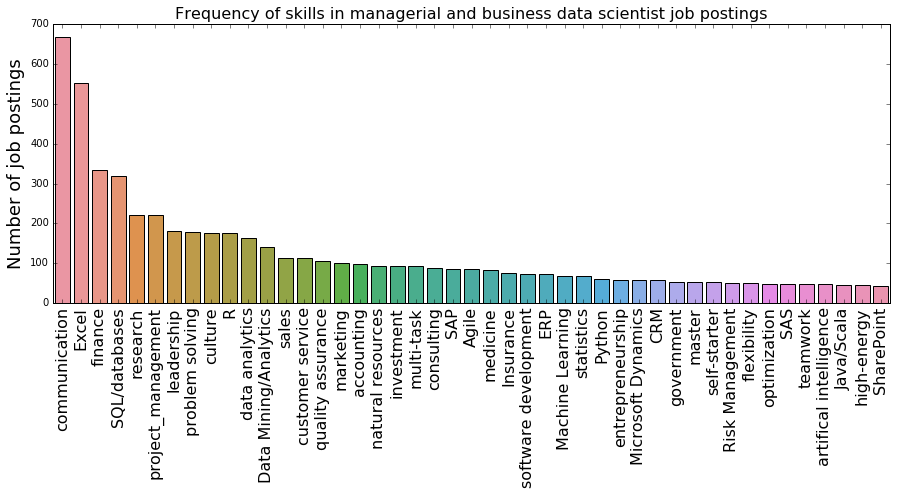

In [0]:
sums_of_skills = data_management_df.sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=sums_of_skills.index, y=sums_of_skills)
plt.xticks(rotation=90,size=16)
plt.ylabel("Number of job postings",size=18)
plt.title("Frequency of skills in managerial and business data scientist job postings",size=16)
plt.show()

Let's look at K-means clustering and hierarchical clustering for the project management and business dataset:

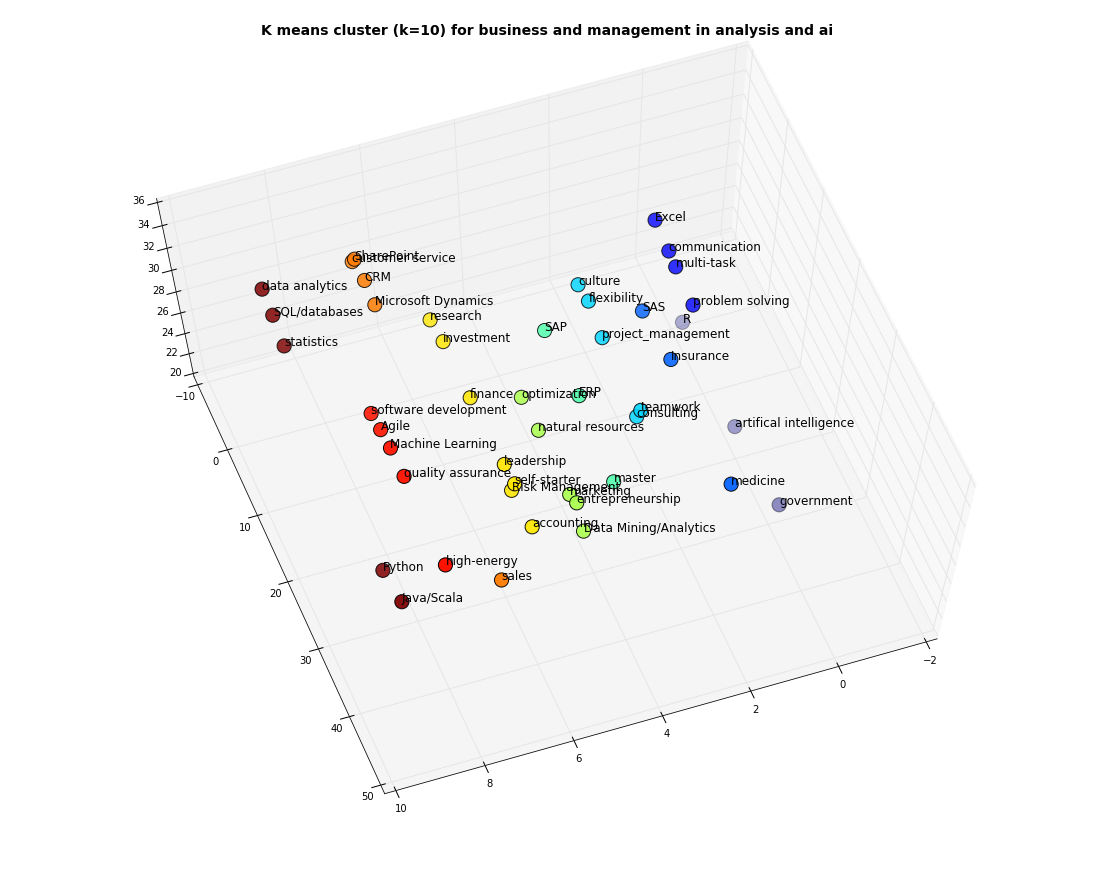

In [0]:
x=data_management_df.copy()
#x=StandardScaler().fit_transform(x)
y_kmeans=cluster_features3(x,10)

Given the difficulty to see so many features in a scatter plot, let's simply output the different groups:

In [0]:
#how k means cluster result k=10
k_means_cluster_result(data_management_df,10)

{0: ['R', 'artifical intelligence', 'government'],
 1: ['Excel', 'communication', 'multi-task', 'problem solving'],
 2: ['SAS', 'Insurance', 'medicine'],
 3: ['culture', 'flexibility', 'project_management', 'consulting', 'teamwork'],
 4: ['SAP', 'ERP', 'master'],
 5: ['optimization',
  'natural resources',
  'marketing',
  'entrepreneurship',
  'Data Mining/Analytics'],
 6: ['research',
  'investment',
  'finance',
  'leadership',
  'Risk Management',
  'self-starter',
  'accounting'],
 7: ['customer service', 'SharePoint', 'CRM', 'Microsoft Dynamics', 'sales'],
 8: ['software development',
  'Agile',
  'Machine Learning',
  'quality assurance',
  'high-energy'],
 9: ['data analytics', 'SQL/databases', 'statistics', 'Python', 'Java/Scala']}

Implementing hierarchical clustering to check how data clusters based on euclidean distance metrics:

([], <a list of 0 Text yticklabel objects>)

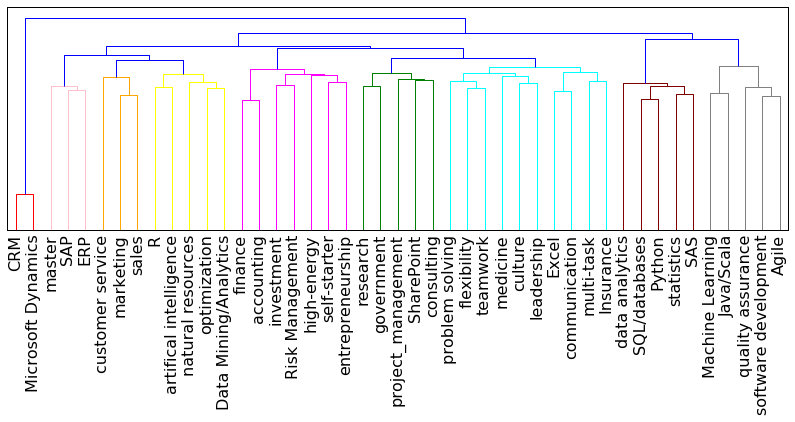

In [0]:
x=data_management_df.copy()
#x=StandardScaler().fit_transform(x)
df_data_management = pd.DataFrame(x, columns=list(data_management_df))
dendogram_features(df_data_management, 'ward','euclidean',45)
plt.yticks([],[])

As we can observe in the above dendrogram, topics are distributed according to their relative proximity with each other. We can design a curriculum out of these topics

In [0]:
def simple_score(clf,X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12345)
    clf.fit(X_train,y_train)
    y_test_pred=clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    return acc

Let's implement decision trees

In [0]:
feat_selection=SelectKBest(f_classif, k=20)
univariate_data = SelectKBest(f_classif, k=20).fit_transform(df_data_management.drop(columns=['project_management']), df_data_management['project_management'])
F, pval=f_classif(df_data_management.drop(columns=['project_management']), df_data_management['project_management'])
pd_feature_f_test=pd.DataFrame({'feature F':F, 'feature p':pval, 'features':(list(df_data_management.drop(columns=['project_management'])))})
                                    #(list(data_temp.iloc[:,:data_temp.shape[1]-1]))
#pd_feature_importance=pd_feature_importance[pd_feature_importance['feature_importance']>1e-5
 
columns=list(pd_feature_f_test.nlargest(20, ['feature F'])['features'])
#X=pd.DataFrame(data=univariate_data, columns=columns);
X=pd.DataFrame(data=univariate_data, columns=columns);
Y=df_data_management['project_management']



/usr/local/lib/python3.5/dist-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


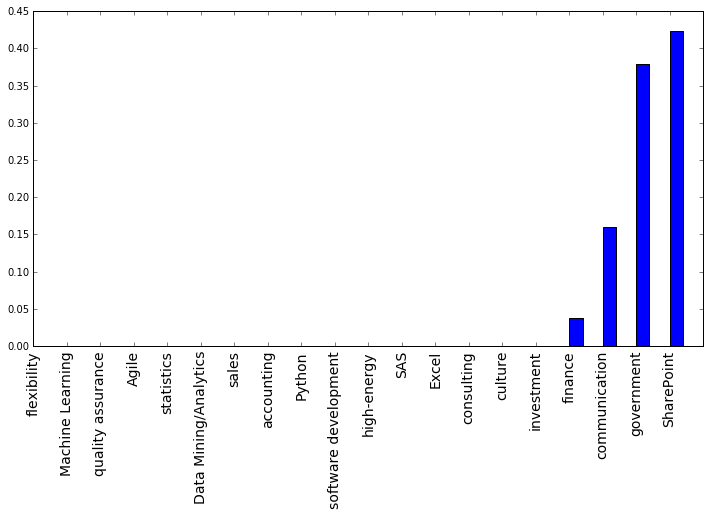

Feature importance according to decision tree: 


feature  feature_importance
0             flexibility            0.000000
17       Machine Learning            0.000000
2       quality assurance            0.000000
16                  Agile            0.000000
4              statistics            0.000000
5   Data Mining/Analytics            0.000000
6                   sales            0.000000
7              accounting            0.000000
8                  Python            0.000000
18   software development            0.000000
10            high-energy            0.000000
11                    SAS            0.000000
12                  Excel            0.000000
13             consulting            0.000000
14                culture            0.000000
15             investment            0.000000
9                 finance            0.037283
1           communication            0.160122
3              government            0.378958
19             SharePoint            0.423636

In [0]:
# do classification to determine which features are relevant to the features 
#project management

feature_importance=[]
tree_acc=[]
time_tree=[]
reg=tree.DecisionTreeClassifier(min_samples_leaf=60)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12345)
    reg.fit(X_train,y_train)
    y_test_pred=reg.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    feature_importance.append(reg.feature_importances_)
feature_importance=np.mean(feature_importance,axis=0)  
pd_feature_importance=pd.DataFrame({'feature_importance': feature_importance, 'feature': columns})
pd_feature_importance=pd_feature_importance.sort_values(by='feature_importance',ascending='False')
plt.figure(figsize=(12,6))
plt.bar(np.arange(len(pd_feature_importance)),pd_feature_importance['feature_importance'], width=0.4);
plt.xticks(np.arange(len(pd_feature_importance)), pd_feature_importance['feature'], rotation=90, size=14);
plt.show()

print('Feature importance according to decision tree: ')
pd_feature_importance

The figure above shows the most important features found by decision tree for determining the arbitrarily chosen target feature "project management". We can observe that features such as sharepoint, government, communications and finance appear to play a significant importance. This may indicate the importance that such topics should have in a curriculum.

Let's now plot the decision tree:

In [0]:
reg=tree.DecisionTreeClassifier(min_samples_leaf=20)
reg.fit(X,Y)
tree.export_graphviz(reg,
out_file='tree.dot', feature_names=columns, filled=True)   
!dot -Tpng tree.dot -o tree.png -Gdpi=600
from IPython.display import Image
Image(filename = 'tree.png')

In [0]:
feat_selection=SelectKBest(f_classif, k=20)
univariate_data = SelectKBest(f_classif, k=20).fit_transform(df_data_management.drop(columns=['data analytics']), df_data_management['data analytics'])
F, pval=f_classif(df_data_management.drop(columns=['data analytics']), df_data_management['data analytics'])
print(len(F))
print(len(pval))
pd_feature_f_test=pd.DataFrame({'feature F':F, 'feature p':pval, 'features':(list(df_data_management.drop(columns=['data analytics'])))})
columns=list(pd_feature_f_test.nlargest(20, ['feature F'])['features'])
X=pd.DataFrame(data=univariate_data, columns=columns);
Y=df_data_management['data analytics']



44
44


/usr/local/lib/python3.5/dist-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


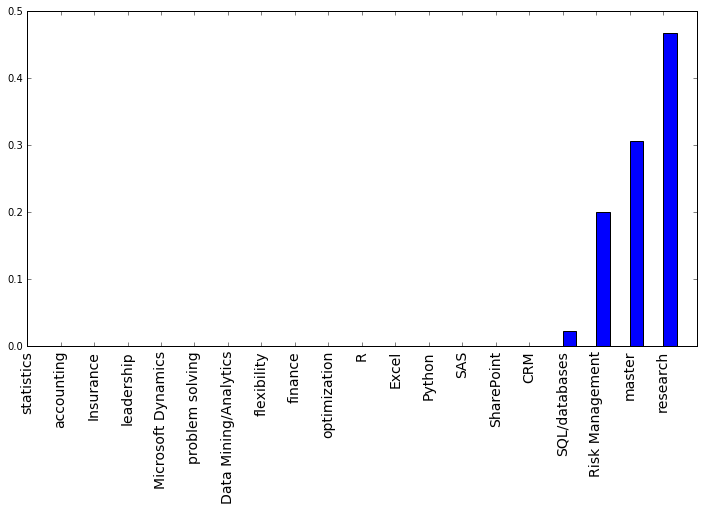

Feature importance according to decision tree: 


feature  feature_importance
0              statistics            0.000000
17             accounting            0.000000
16              Insurance            0.000000
15             leadership            0.000000
14     Microsoft Dynamics            0.000000
13        problem solving            0.000000
12  Data Mining/Analytics            0.000000
10            flexibility            0.000000
18                finance            0.000000
9            optimization            0.000000
6                       R            0.000000
5                   Excel            0.000000
2                  Python            0.000000
8                     SAS            0.000000
19             SharePoint            0.000000
11                    CRM            0.000431
1           SQL/databases            0.023309
4         Risk Management            0.201081
7                  master            0.307048
3                research            0.468132

In [0]:

feature_importance=[]
tree_acc=[]
time_tree=[]
reg=tree.DecisionTreeClassifier(min_samples_leaf=60)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12345)
    reg.fit(X_train,y_train)
    y_test_pred=reg.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    feature_importance.append(reg.feature_importances_)
feature_importance=np.mean(feature_importance,axis=0)  
pd_feature_importance=pd.DataFrame({'feature_importance': feature_importance, 'feature': columns})
pd_feature_importance=pd_feature_importance.sort_values(by='feature_importance',ascending='False')
plt.figure(figsize=(12,6))
plt.bar(np.arange(len(pd_feature_importance)),pd_feature_importance['feature_importance'], width=0.4);
plt.xticks(np.arange(len(pd_feature_importance)), pd_feature_importance['feature'], rotation=90, size=14);
plt.show()
#output most relevant features according to decision tree:
print('Feature importance according to decision tree: ')
pd_feature_importance

Given the results shown in this section, we can make inferences about which curriculum would be more adequate to data analysts + AI with a focus on managing and business. 

The following curriculum has been suggested, based primarily on the dendrogram:

* Business process management
* Data analytics for marketing
* Big data analytics and optimization
* Accounting and finance for data analytics
* Enterprise Risk management
* Applied project management
* Team projects + practicum/internship
* Business analytics and project management
* Software project management


## Part 4: Data Science Education EdTech Effort

First, it is important to evaluate the different companies that are advertising on Indeed in order to identify where the demands are for data scientists

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


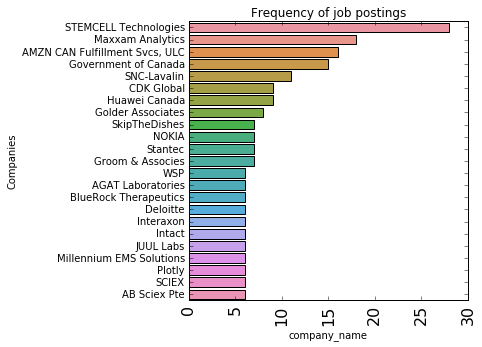

In [0]:
# get company names and frequencies from the data science dataset:
sums_of_companies = results_df['company_name'].groupby(results_df['company_name']).count()
sums_of_companies=sums_of_companies[sums_of_companies>5]
sums_of_companies.sort_values(inplace=True,ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(y=sums_of_companies.index, x=sums_of_companies)
plt.xticks(rotation=90,size=16)
plt.ylabel("Companies")
plt.title("Frequency of job postings")
plt.show()

Adding another dataset obtained from indeed web scrapping for "data analyst"

In [0]:
data_analytics_df=pd.read_csv('data_analytics_CA.csv')
df_comb=pd.concat([results_df[['Unnamed: 0','job_title','company_name','job_description']],data_analytics_df[['Unnamed: 0','job_title','company_name','job_description']]],axis=0)
df_comb.shape

(1725, 4)

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


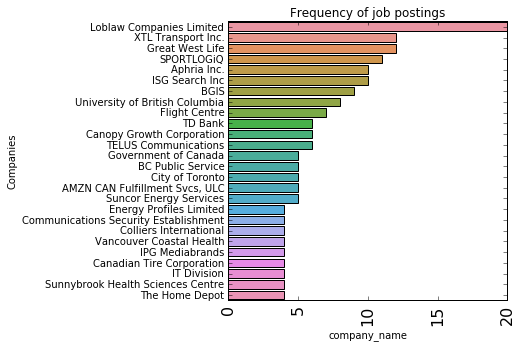

In [0]:
sums_of_companies = data_analytics_df['company_name'].groupby(data_analytics_df['company_name']).count()
sums_of_companies=sums_of_companies[sums_of_companies>3]
sums_of_companies.sort_values(inplace=True,ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(y=sums_of_companies.index, x=sums_of_companies)
plt.xticks(rotation=90,size=16)
plt.ylabel("Companies")
plt.title("Frequency of job postings")
plt.show()

Look into the areas of business and the number of job postings:

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


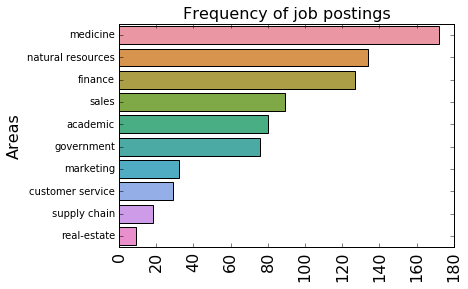

In [0]:

area=pd.concat([results_reeval['academic'],results_reeval['customer service'],results_reeval['medicine'],
               results_reeval['finance'],results_reeval['sales'],results_reeval['real-estate'],results_reeval['natural resources'],results_reeval['government'],
            results_reeval['marketing'],results_reeval['supply chain'] ],axis=1)        
sums_of_companies = area.sum().sort_values(ascending=False)
#plt.figure(figsize=(10,10))
sns.barplot(y=sums_of_companies.index, x=sums_of_companies)
plt.xticks(rotation=90,size=16)
plt.ylabel("Areas",size=16)
plt.title("Frequency of job postings",size=16)
plt.show()        

Look at the data_management dataset to see which areas are in high demand today:

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


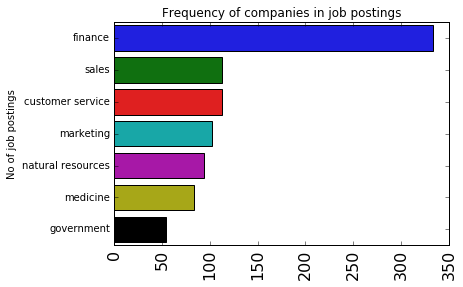

In [0]:
area=pd.concat([df_data_management['customer service'],df_data_management['medicine'],
               df_data_management['finance'],df_data_management['sales'],df_data_management['natural resources'],df_data_management['government'],
            df_data_management['marketing']],axis=1)        
sums_of_companies = area.sum().sort_values(ascending=False)
#plt.figure(figsize=(10,10))
sns.barplot(y=sums_of_companies.index, x=sums_of_companies)
plt.xticks(rotation=90,size=16)
plt.ylabel("No of job postings")
plt.title("Frequency of companies in job postings")
plt.show()    

Create matrix of features for the combined dataset by 

In [0]:
results_dict = {}   # empty dictionary to store results of parsing of job pages
results_area={}
results_title={}
results_company={}
for index in range(len(df_comb['Unnamed: 0'])):
        results_dict[index] = {}
        results_area[index] = {}
        results_title[index] = {}
        results_company[index]={}

title=['data analyst', 'data scientist'];     

soup_job_text = df_comb['job_description']
soup_job_title = df_comb['job_title'].apply(lambda x: x.lower())
for index in range(len(df_comb['Unnamed: 0'])):
    category_found = 0

    
    for skill_category, skills in skills_keywords_dict_data_science.items(): # loop over all keys and sublists in 'skills_keywords_dict'
            
        category_found = 0   # variable used to store results of the intermediate check (loop below)
            
        for skill in skills:        # loop over all skills in the sublist of 'skills_keywords_dict'
            if soup_job_text.iloc[index].find(skill) != -1:     # if skill from the sublist is found, set 'category_found' to 1
                 category_found = 1
            
            results_dict[index][skill_category] = category_found   # skill set to 1 if found, 0 if not, in 'resutls_dict'
            #results_title[index] =soup_job_title.iloc[index]
            
    #for title in titles: # loop over all keys and sublists in 'skills_keywords_dict'
    if ((soup_job_title.iloc[index].find(title[0]) != -1) & (soup_job_title.iloc[index].find(title[1]) == -1)):
        results_title[index]=1
    elif ((soup_job_title.iloc[index].find(title[0]) == -1) & (soup_job_title.iloc[index].find(title[1]) != -1)):
        results_title[index]=2
    elif ((soup_job_title.iloc[index].find(title[0]) != -1) & (soup_job_title.iloc[index].find(title[1]) != -1)):   
        results_title[index]=3
    else:
        results_title[index]=0
        category_found = 0   # variable used to store results of the intermediate check (loop below)
        
df_analytics=pd.DataFrame.from_dict(results_dict, orient='index')
df_jobs=pd.DataFrame.from_dict(results_title, orient='index')
df_total=pd.concat([df_jobs,df_analytics],axis=1)
(df_total[0]==1).count()
df_jobs2=df_total[df_total[0]>0]

Functions to display results from ML training of the most relevant features:

In [0]:
def word_count(df_total,feature_importance,area,XX):
    feat=feature_importance[XX.corrwith(df_total[area],axis=0)>0]
    feat=feat.nlargest(10) 
    list_feat=feat.index.values.tolist()
    number_of_hits=XX[list_feat].mul(df_total[area],axis=0).sum()
    max_num=max(number_of_hits) 
    number_of_hits=number_of_hits/max_num 
    
    wc = WordCloud(background_color='white').generate_from_frequencies(feat)
    #plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
   

Create a random forest to identify how each soft skill and area relates to the job choice of either being a data analyst or a data scientist. First let's look at features importance for either jobs

In [0]:

X=df_jobs2[['communication','problem solving','project_management','leadership','consulting',
           'flexibility','professionalism','teamwork','self-starter','multi-task','ethics','creativity',
           'academic','research','customer service','medicine','finance',
           'sales','real-estate','natural resources','government','marketing','supply chain','investment',
           'entrepreneurship','accounting','economics','quality assurance','operations management']]
Y=df_jobs2[0]
feature_importance=[]
acc=[]
#first define how to split which title is better based on traits and area:
reg = RandomForestClassifier(n_estimators=100, max_depth=2)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12345)
    reg.fit(X_train,y_train)
    y_test_pred=reg.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_test_pred))
    feature_importance.append(reg.feature_importances_)
feature_importance=np.mean(feature_importance,axis=0)  
pd_feature_importance=pd.DataFrame(data=feature_importance, index=list(X))
#y_pos = np.arange(len(tree_acc))
print("Average testing accuracy over the 10-fold cross validation (score= "+str(np.mean(acc))+")")
pd_feature_importance.nlargest(10,0) 


Average testing accuracy over the 10-fold cross validation (score= 0.7068965517241379)


0
research           0.143209
customer service   0.125795
natural resources  0.122387
problem solving    0.100444
communication      0.082183
economics          0.054154
medicine           0.054090
marketing          0.029356
sales              0.028587
investment         0.022372

Let's see what features are more relevant to data science jobs and data analysis jobs, and plot the word cloud based on relative importance from random forest for all features that are positively correlated with the jobs

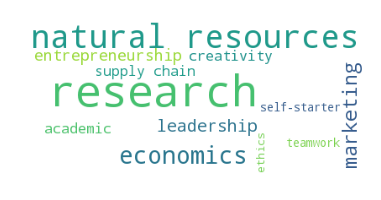

In [0]:
from collections import OrderedDict, defaultdict
YY=df_jobs2[0]
Y_sc=YY.copy()
Y_sc[Y_sc!=2]=0
Y_sc[Y_sc==2]=1
Y_an=YY.copy()
Y_an[Y_an!=1]=0
Y_an[Y_an==1]=1

feature_importance=[]
acc=[]
reg = RandomForestClassifier(n_estimators=100, max_depth=2)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y_sc, test_size=0.30, random_state=12345)
    reg.fit(X_train,y_train)
    y_test_pred=reg.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_test_pred))
    feature_importance.append(reg.feature_importances_)
feature_importance=np.mean(feature_importance,axis=0)  
pd_feature_importance=pd.DataFrame(data=feature_importance, index=list(X))
feat=pd_feature_importance[X.corrwith(Y_sc,axis=0)>0]
#feat=pd_feature_importance.nlargest(20,0) 
list_feat=feat.index.values.tolist()
number_of_hits=X[list_feat].mul(Y_sc,axis=0).sum()
max_num=max(number_of_hits) 
number_of_hits=number_of_hits/max_num 
    
freq=X.sum()

wc = WordCloud(background_color='white').generate_from_frequencies(feat[0])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

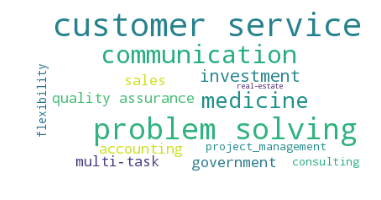

In [0]:
feature_importance=[]
acc=[]
reg = RandomForestClassifier(n_estimators=100, max_depth=2)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y_an, test_size=0.30, random_state=12345)
    reg.fit(X_train,y_train)
    y_test_pred=reg.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_test_pred))
    feature_importance.append(reg.feature_importances_)
feature_importance=np.mean(feature_importance,axis=0)  
pd_feature_importance=pd.DataFrame(data=feature_importance, index=list(X))
feat=pd_feature_importance[X.corrwith(Y_an,axis=0)>0]
#feat=pd_feature_importance.nlargest(20,0) 
list_feat=feat.index.values.tolist()
number_of_hits=X[list_feat].mul(Y_sc,axis=0).sum()
max_num=max(number_of_hits) 
number_of_hits=number_of_hits/max_num 
    
freq=X.sum()

wc = WordCloud(background_color='white').generate_from_frequencies(feat[0])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Now, plot word clouds for all skills that are closely related to the different industry areas. Each area will have its own word cloud. The cloud is generated by running random forest to identify most relevant features, which are then filtered by excluding the negatively correlated features. This ensures that only features that have a positive correlation with the industry area are shown.

Testing accuracy of random forest for customer service =0.9073359073359073
Testing accuracy of random forest for medicine =0.8185328185328186
Testing accuracy of random forest for finance =0.7702702702702703
Testing accuracy of random forest for sales =0.8745173745173745
Testing accuracy of random forest for real-estate =0.974903474903475
Testing accuracy of random forest for natural resources =0.8687258687258688
Testing accuracy of random forest for government =0.9131274131274131
Testing accuracy of random forest for marketing =0.9787644787644788
Testing accuracy of random forest for supply chain =0.9613899613899614
Testing accuracy of random forest for investment =0.9227799227799228
Testing accuracy of random forest for accounting =0.944015444015444


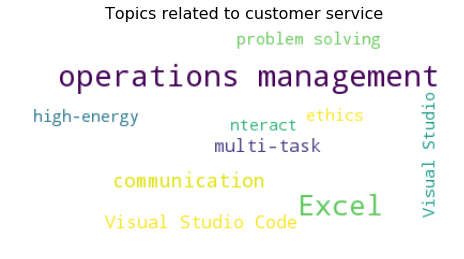

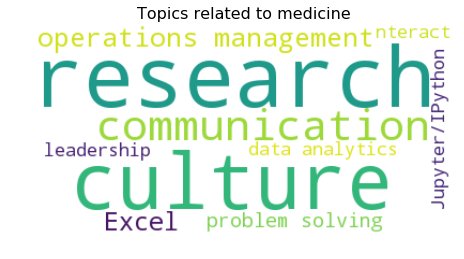

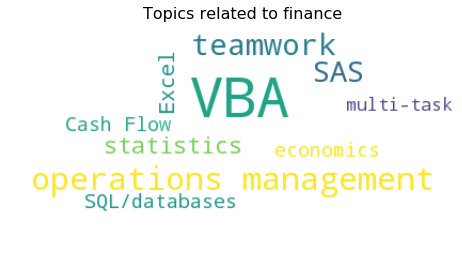

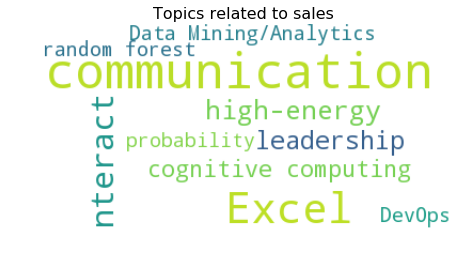

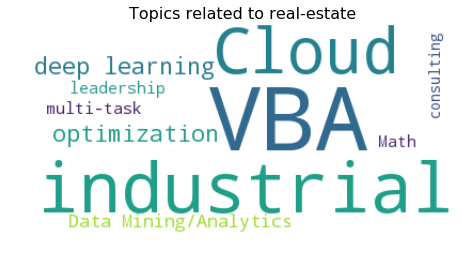

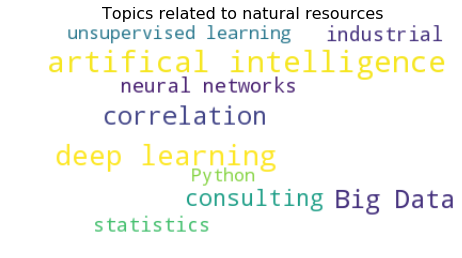

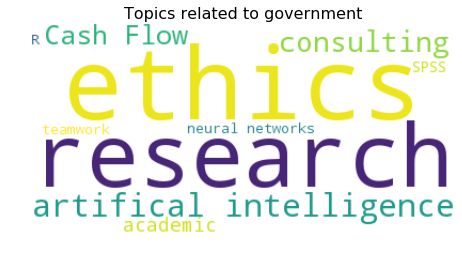

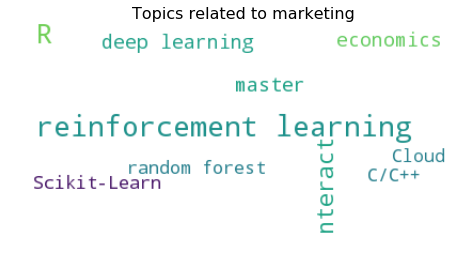

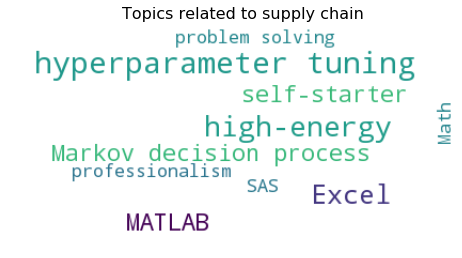

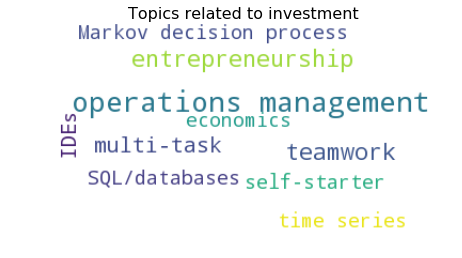

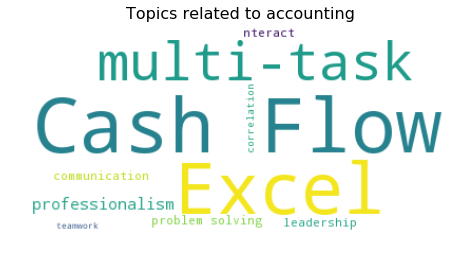

In [0]:
courses_per_area=['customer service','medicine','finance',
           'sales','real-estate','natural resources','government','marketing','supply chain','investment',
           'accounting']
XX=df_total.drop(columns=courses_per_area).copy()
XX=XX.drop(columns=0)

feature_importance=pd.DataFrame()
acc=[]
reg = RandomForestClassifier(n_estimators=100, max_depth=2)
i=1
for area in courses_per_area:
    Y=df_total[area]
    X=XX.copy()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12345)
    reg.fit(X_train,y_train)
    y_test_pred=reg.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_test_pred))
    fi=pd.Series(reg.feature_importances_,name=area,index=list(XX))
    feature_importance=pd.concat([feature_importance,fi],axis=1,sort=False)
    #plt.figure(figsize=(10,10))
    plt.figure(figsize=(20,20))
    plt.subplot(6,2,i)
    
    i=i+1
    word_count(df_total,fi,area,X)
    ttl=plt.title("Topics related to "+area,size=16)
    #ttl.set_position([.5, 1.1])
    plt.tight_layout()
    print("Testing accuracy of random forest for "+area+" ="+str(metrics.accuracy_score(y_test, y_test_pred)))




Based on these results, we can develop curricula that fits more closely to different users, depending on their skill-set (soft skills) and their industry/job interest. More insights and details are presented on the slides and report. 